# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install libraries

In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [4]:
#Load the required libraries

import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima.arima.utils import ndiffs
import pmdarima as pm


In [5]:
# comment this cell if you don't mind to displaying static plotly charts on github
import plotly.io as pio
pio.renderers.default = "png"

# Import Data

In [6]:
data_BTC = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Project_Data/binance/BTCUSDT_merged.csv")
data_ETH = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Project_Data/binance/ETHUSDT_merged.csv")

In [7]:
data_BTC.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [8]:
data_ETH.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


Here's a breakdown of each feature:

- **open_time**: This represents the opening time of a specific period in Unix time format. Unix time is a way to represent time as the number of seconds that have elapsed since January 1, 1970.

- **open**: This refers to the opening price of the trading instrument at the given period.

- **high**: This represents the highest price reached by the trading instrument during the specified period.

- **low**: This denotes the lowest price reached by the trading instrument during the specified period.

- **close**: This indicates the closing price of the trading instrument at the given period.

- **volume**: This refers to the total volume, typically the quantity of the trading instrument, traded during the specified period.

- **close_time**: This represents the closing time of the specific period in Unix time format.

- **quote_volume**: This refers to the total volume in terms of the quote asset. The quote asset is the asset used to determine the value of the trading instrument.

- **count**: This represents the number of trades that occurred during the specified period.

- **taker_buy_volume**: This denotes the volume of the quote asset bought by takers (market takers) during the specified period.

- **taker_buy_quote_volume**: This represents the volume of the base asset bought by takers (market takers) during the specified period.

In [9]:
# Renaming the columns to match the name in the previous notebook with bitstamp data so that I do not have to change the whole code
data_BTC.rename(columns = {'open_time':'date', 'volume':'Volume'}, inplace = True)
data_ETH.rename(columns = {'open_time':'date', 'volume':'Volume'}, inplace = True)

In [10]:
data_BTC.head()

,date,open,high,low,close,Volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [11]:
data_ETH.head()

,date,open,high,low,close,Volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


In [12]:
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   Volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   Volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
# Removing close time column

data_BTC = data_BTC.drop(columns=['close_time'])
data_ETH = data_ETH.drop(columns=['close_time'])

In [15]:
data_BTC.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,5.216076e+06,5536,368.470786,3.544535e+06


In [16]:
data_ETH.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,4.476401e+05,2848,1524.31952,262782.612091


# EDA

## Converting to Datetime

In [17]:
# Converting the Date column from object to datetime
data_BTC[["date"]] = data_BTC[["date"]].apply(pd.to_datetime)
data_ETH[["date"]] = data_ETH[["date"]].apply(pd.to_datetime)

In [18]:
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   Volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


In [19]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   Volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


## Missing Data

In [20]:
# check for missing data
data_BTC.isnull().any()

date                      False
open                      False
high                      False
low                       False
close                     False
Volume                    False
quote_volume              False
count                     False
taker_buy_volume          False
taker_buy_quote_volume    False
dtype: bool

In [21]:
data_ETH.isnull().any()

date                      False
open                      False
high                      False
low                       False
close                     False
Volume                    False
quote_volume              False
count                     False
taker_buy_volume          False
taker_buy_quote_volume    False
dtype: bool

## Hourly Time Series

### BTC

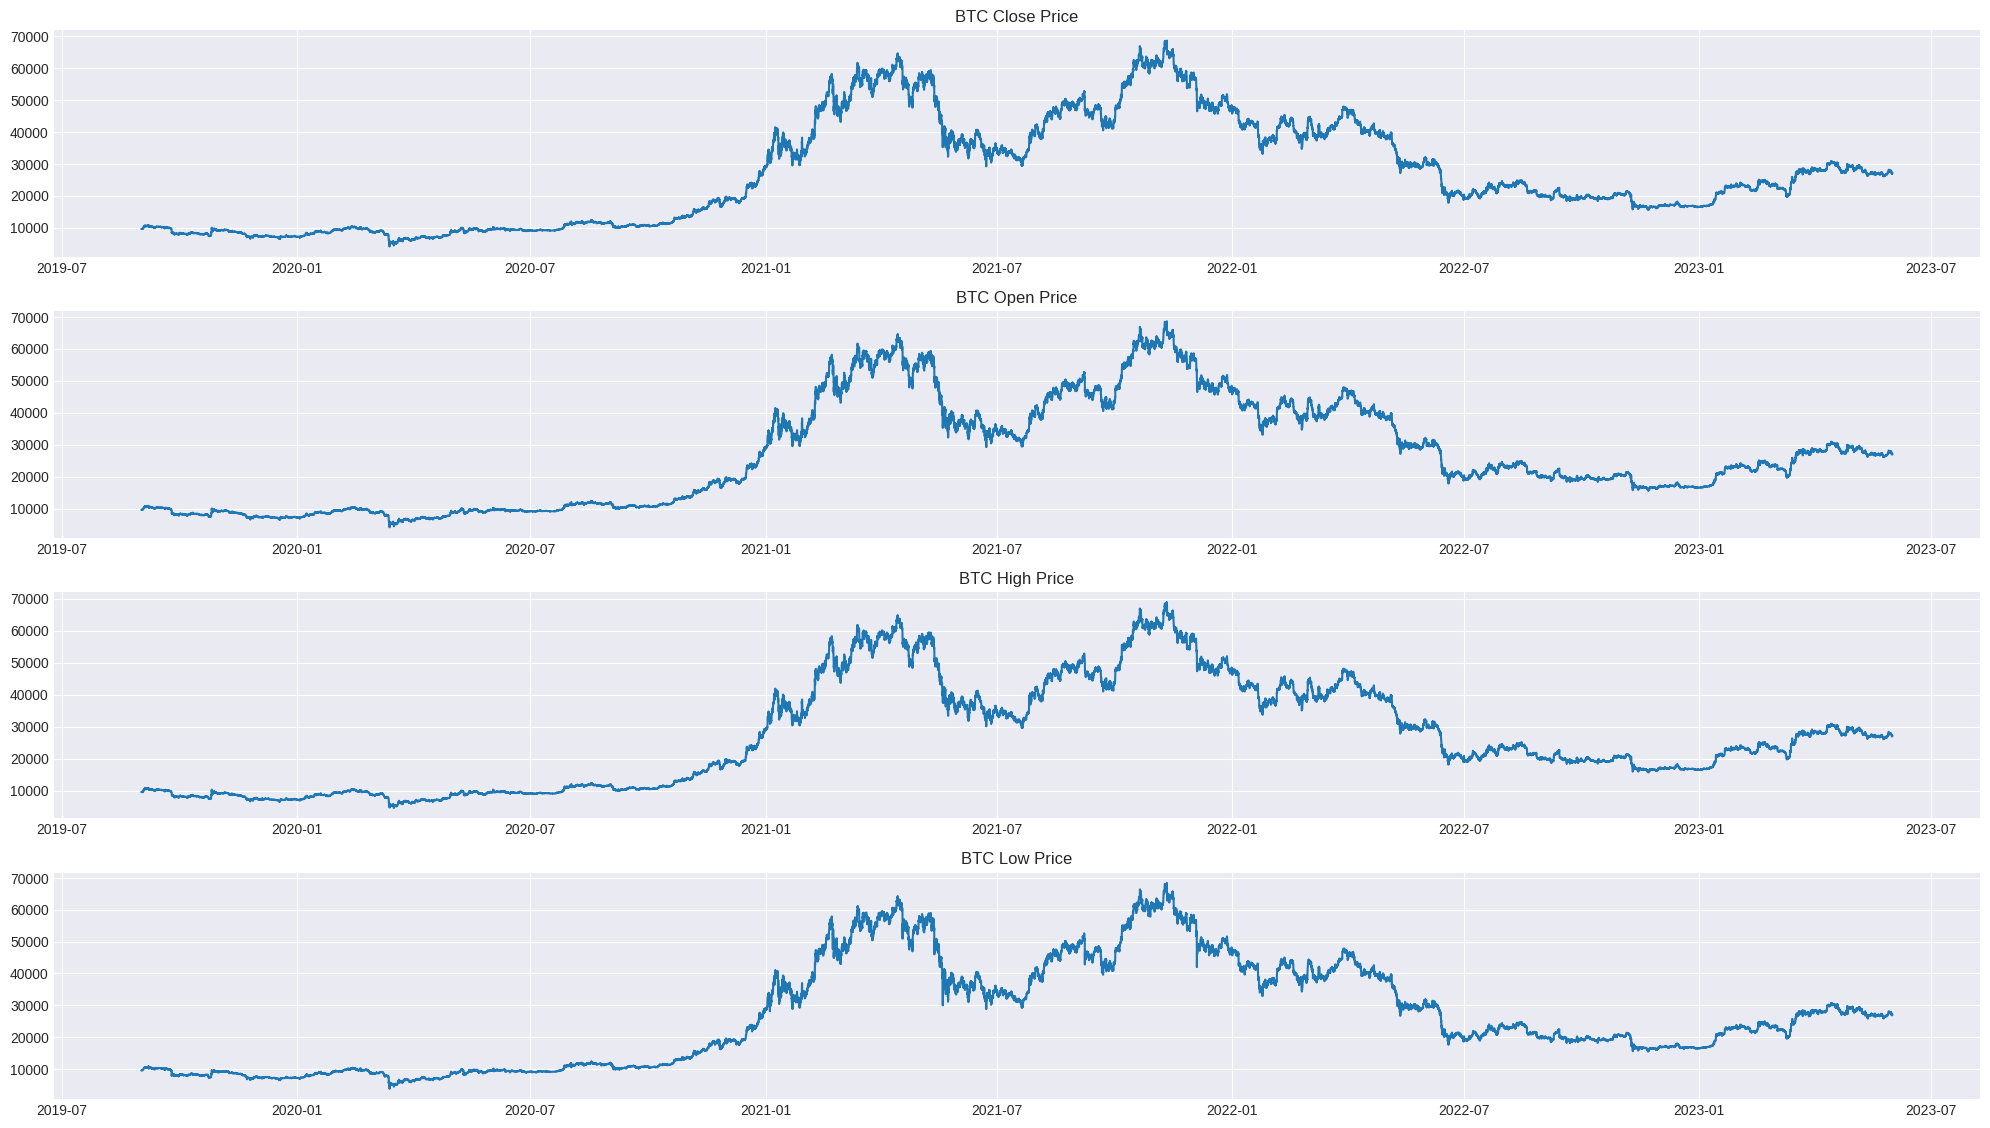

In [22]:
# Plotting OHCL

plt.figure(figsize=(20, 14))

# Plotting Close price
plt.subplot(5, 1, 1)
plt.plot(data_BTC["date"], data_BTC["close"])
plt.title("BTC Close Price")

# Plotting Open price
plt.subplot(5, 1, 2)
plt.plot(data_BTC["date"], data_BTC["open"])
plt.title("BTC Open Price")

# Plotting High price
plt.subplot(5, 1, 3)
plt.plot(data_BTC["date"], data_BTC["high"])
plt.title("BTC High Price")

# Plotting Low price
plt.subplot(5, 1, 4)
plt.plot(data_BTC["date"], data_BTC["low"])
plt.title("BTC Low Price")

plt.tight_layout()
plt.show()



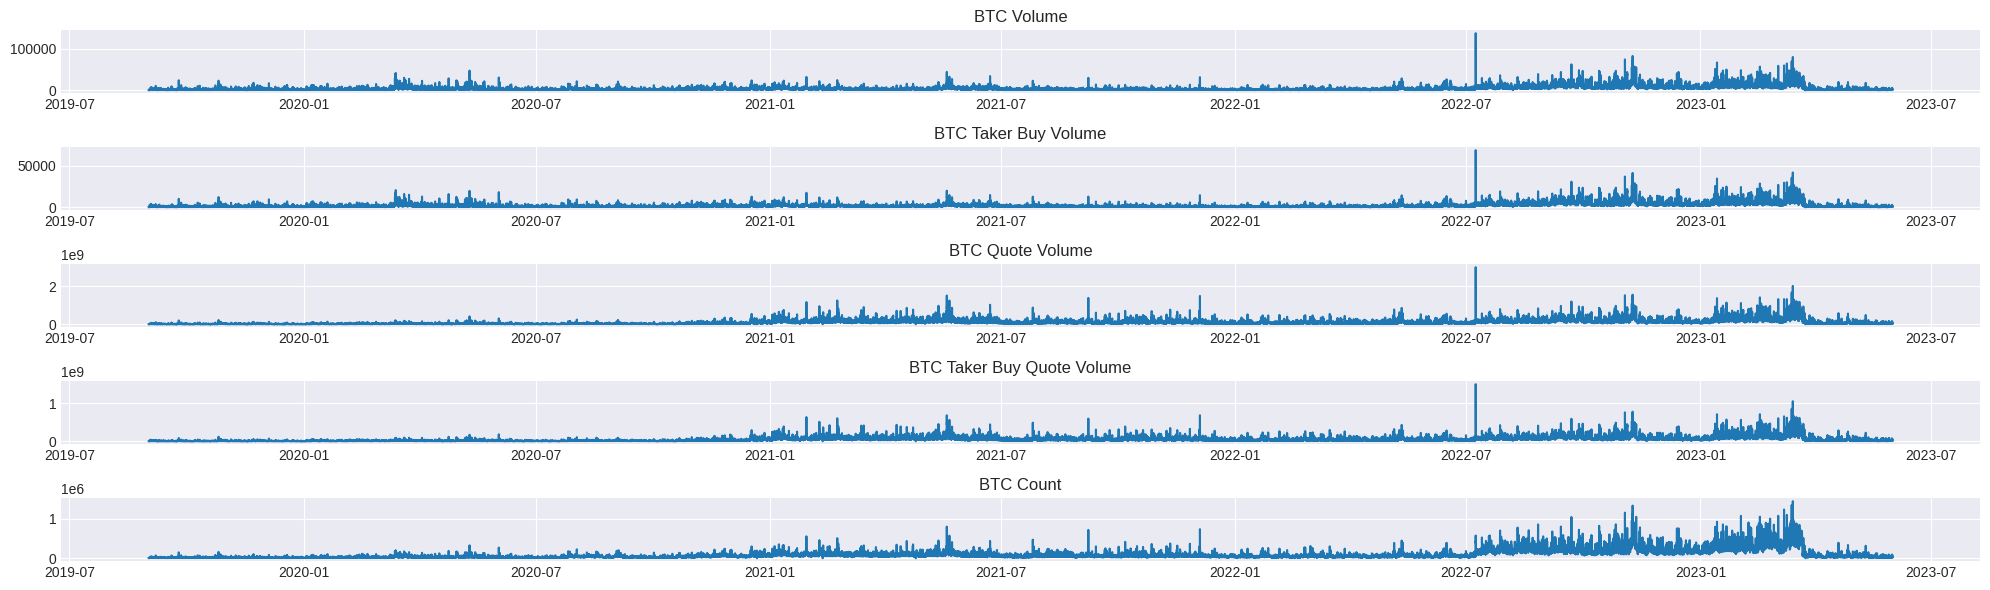

In [23]:
# Plotting Volume and Count (be aware of the axis "y" scale in the charts)

plt.figure(figsize=(20, 6))

# Plotting Volume
plt.subplot(5, 1, 1)
plt.plot(data_BTC["date"], data_BTC["Volume"])
plt.title("BTC Volume")

# Plotting Taker Buy Volume
plt.subplot(5, 1, 2)
plt.plot(data_BTC["date"], data_BTC["taker_buy_volume"])
plt.title("BTC Taker Buy Volume")

# Plotting Quote Volume
plt.subplot(5, 1, 3)
plt.plot(data_BTC["date"], data_BTC["quote_volume"])
plt.title("BTC Quote Volume")

# Plotting Taker Buy Quote Volume
plt.subplot(5, 1, 4)
plt.plot(data_BTC["date"], data_BTC["taker_buy_quote_volume"])
plt.title("BTC Taker Buy Quote Volume")

# Plotting Count
plt.subplot(5, 1, 5)
plt.plot(data_BTC["date"], data_BTC["count"])
plt.title("BTC Count")


plt.tight_layout()
plt.show()

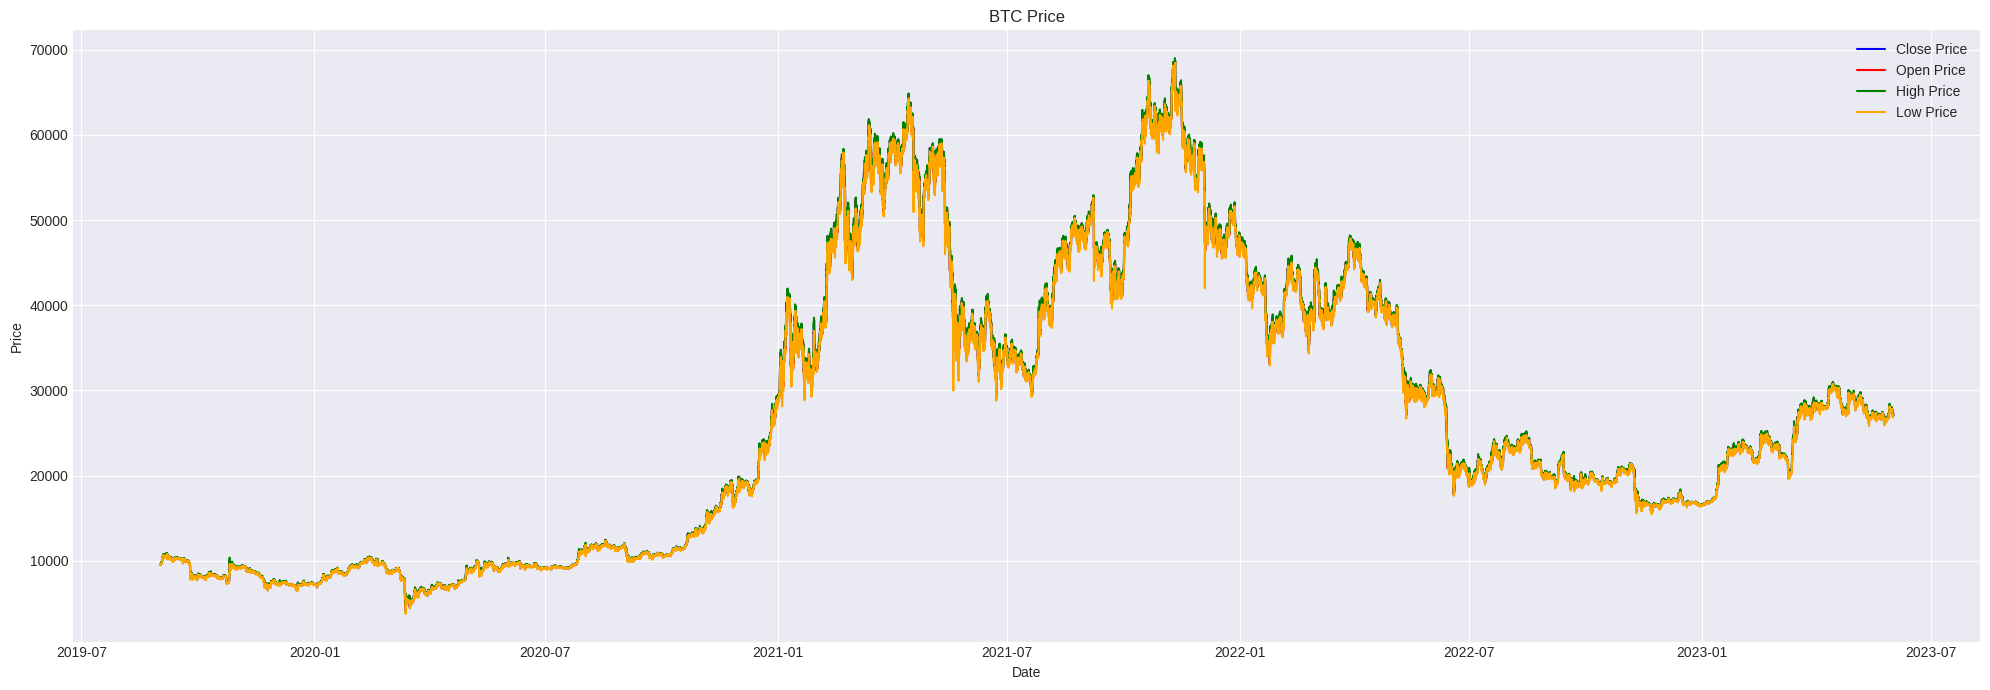

In [24]:
# Plotting OHCL together

plt.figure(figsize=(20, 7))

# Plotting Bitcoin prices
plt.plot(data_BTC["date"], data_BTC["close"], color='blue', label='Close Price')
plt.plot(data_BTC["date"], data_BTC["open"], color='red', label='Open Price')
plt.plot(data_BTC["date"], data_BTC["high"], color='green', label='High Price')
plt.plot(data_BTC["date"], data_BTC["low"], color='orange', label='Low Price')

plt.title("BTC Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()


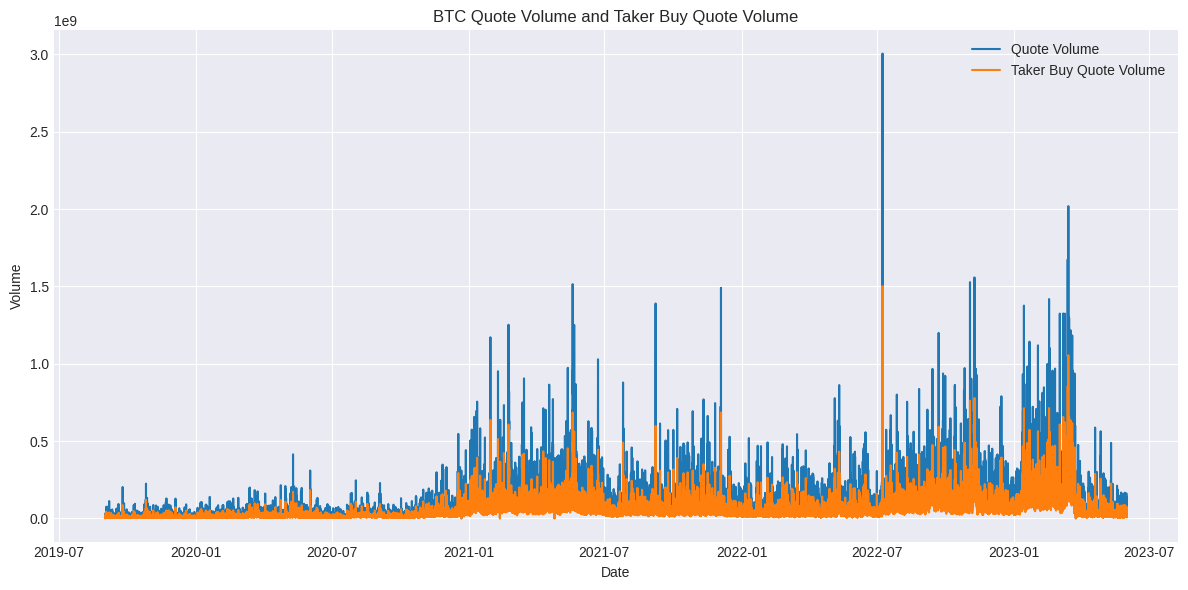

In [25]:
# Plotting together Quote Volume and Taker Buy Quote Volume as they have similar axis

plt.figure(figsize=(12, 6))

# Plotting Quote Volume and Taker Buy Quote Volume
plt.plot(data_BTC["date"], data_BTC["quote_volume"], label="Quote Volume")
plt.plot(data_BTC["date"], data_BTC["taker_buy_quote_volume"], label="Taker Buy Quote Volume")



plt.title("BTC Quote Volume and Taker Buy Quote Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.tight_layout()
plt.show()

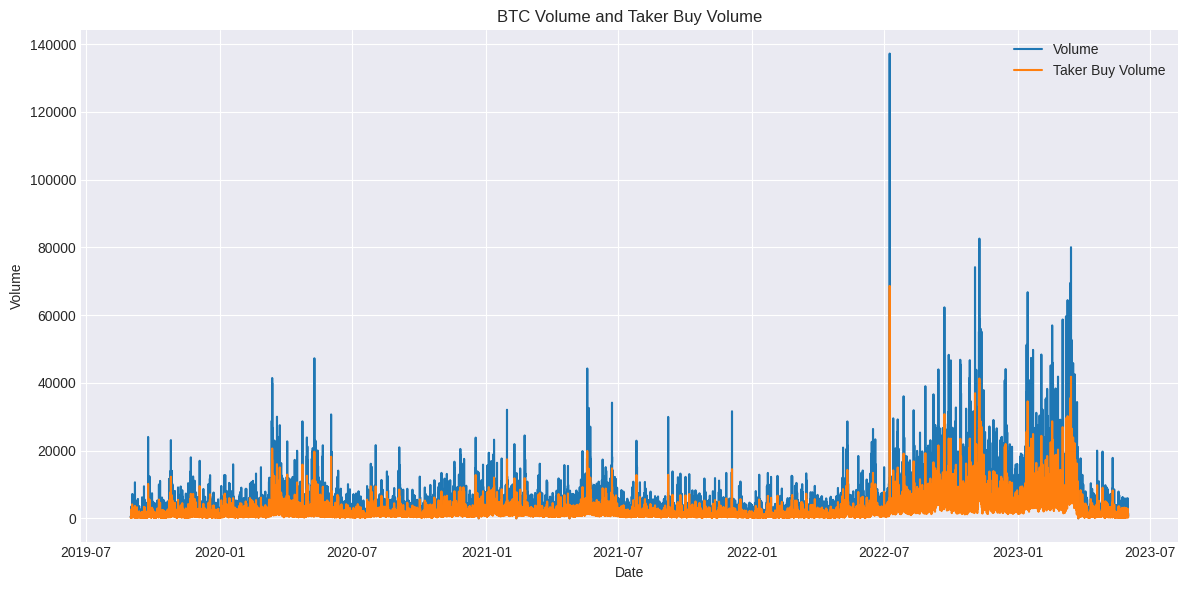

In [26]:
# Plotting together Volume and Taker Buy Volume as they have similar axis

plt.figure(figsize=(12, 6))

# Plotting Quote Volume and Taker Buy Quote Volume
plt.plot(data_BTC["date"], data_BTC["Volume"], label="Volume")
plt.plot(data_BTC["date"], data_BTC["taker_buy_volume"], label="Taker Buy Volume")


plt.title("BTC Volume and Taker Buy Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.tight_layout()
plt.show()

### ETH

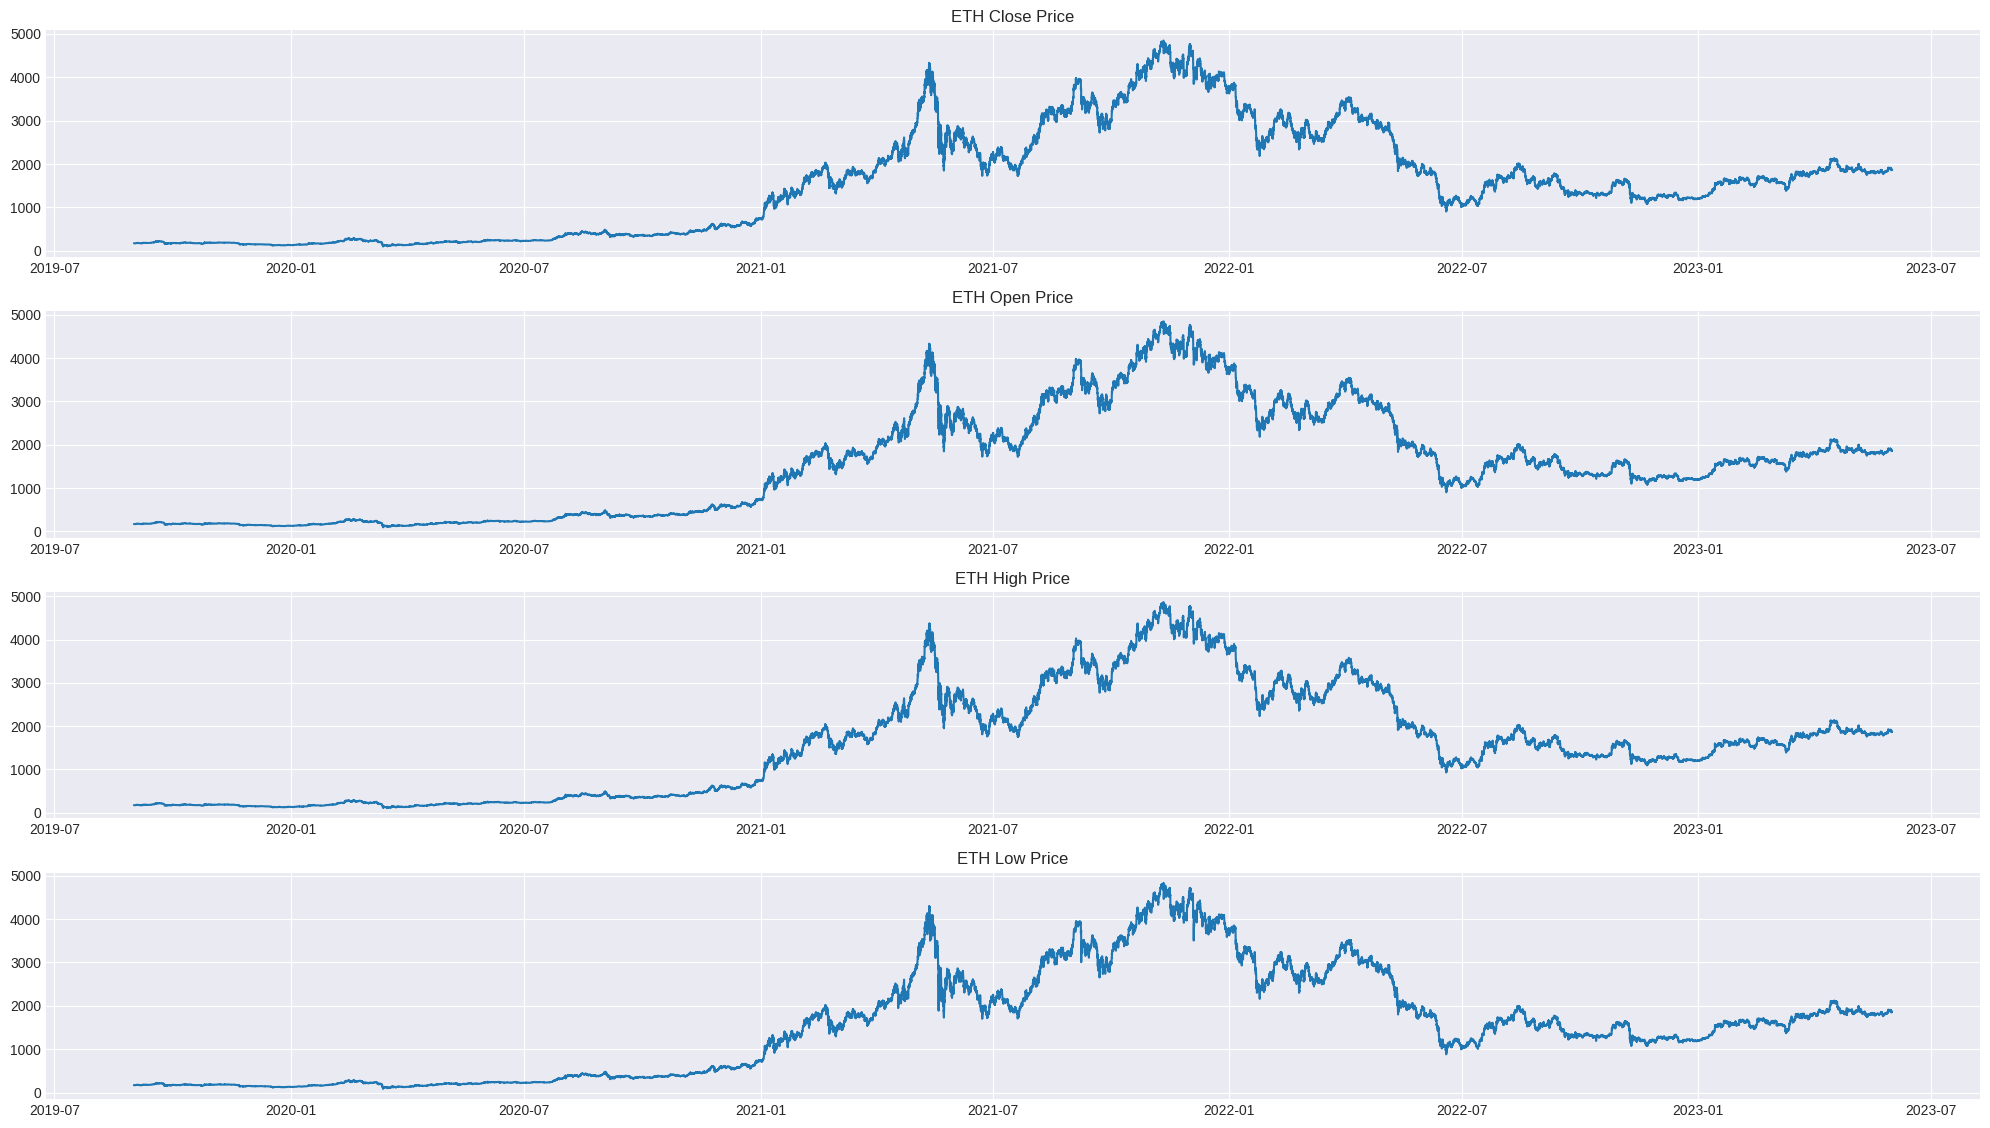

In [27]:
# Plotting OHCL

plt.figure(figsize=(20, 14))

# Plotting Close price
plt.subplot(5, 1, 1)
plt.plot(data_ETH["date"], data_ETH["close"])
plt.title("ETH Close Price")

# Plotting Open price
plt.subplot(5, 1, 2)
plt.plot(data_ETH["date"], data_ETH["open"])
plt.title("ETH Open Price")

# Plotting High price
plt.subplot(5, 1, 3)
plt.plot(data_ETH["date"], data_ETH["high"])
plt.title("ETH High Price")

# Plotting Low price
plt.subplot(5, 1, 4)
plt.plot(data_ETH["date"], data_ETH["low"])
plt.title("ETH Low Price")

plt.tight_layout()
plt.show()



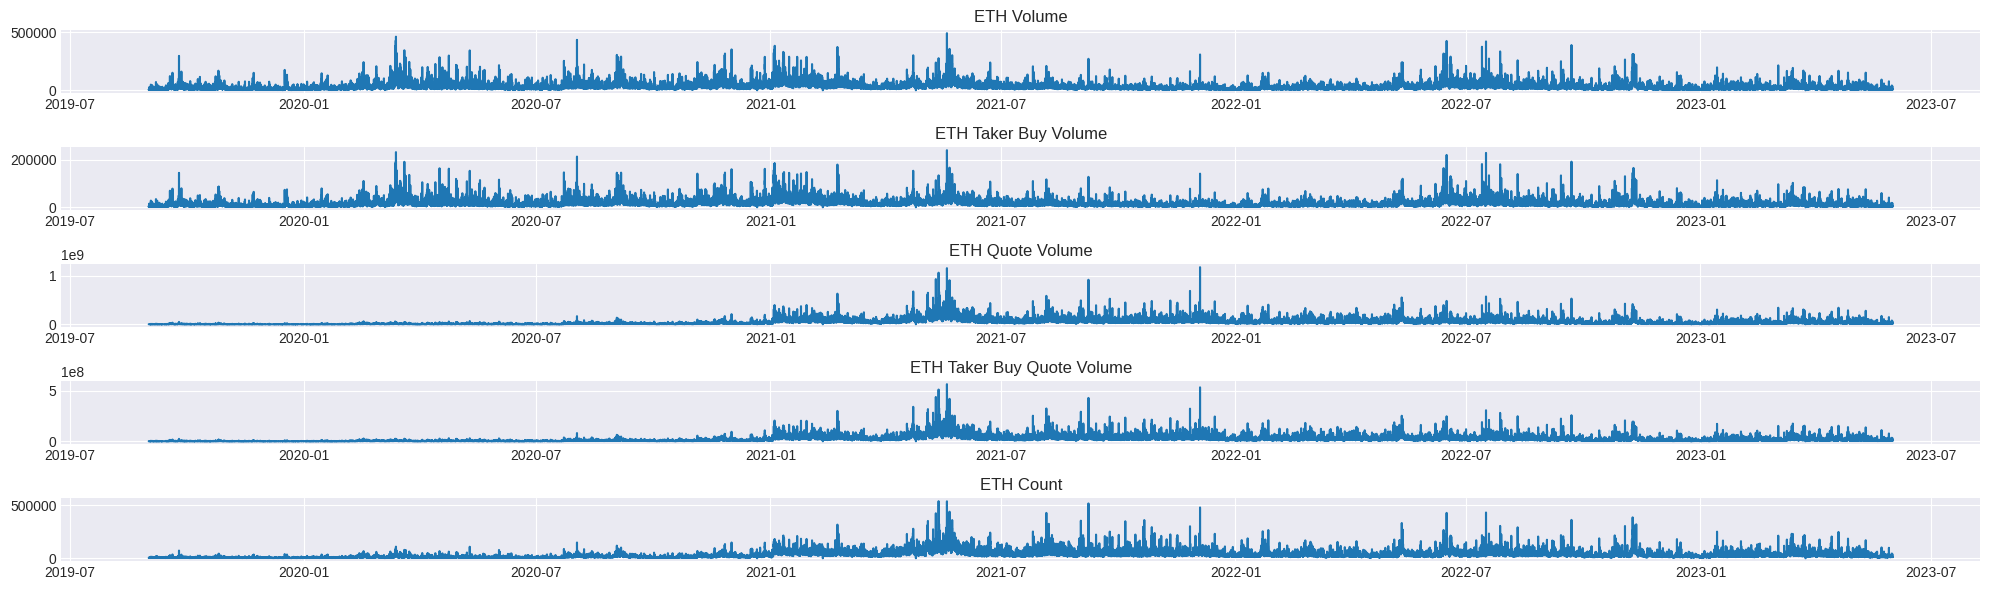

In [28]:
# Plotting Volume and Count (be aware of the axis "y" scale in the charts)

plt.figure(figsize=(20, 6))

# Plotting Volume
plt.subplot(5, 1, 1)
plt.plot(data_ETH["date"], data_ETH["Volume"])
plt.title("ETH Volume")

# Plotting Taker Buy Volume
plt.subplot(5, 1, 2)
plt.plot(data_ETH["date"], data_ETH["taker_buy_volume"])
plt.title("ETH Taker Buy Volume")

# Plotting Quote Volume
plt.subplot(5, 1, 3)
plt.plot(data_ETH["date"], data_ETH["quote_volume"])
plt.title("ETH Quote Volume")

# Plotting Taker Buy Quote Volume
plt.subplot(5, 1, 4)
plt.plot(data_ETH["date"], data_ETH["taker_buy_quote_volume"])
plt.title("ETH Taker Buy Quote Volume")

# Plotting Count
plt.subplot(5, 1, 5)
plt.plot(data_ETH["date"], data_ETH["count"])
plt.title("ETH Count")


plt.tight_layout()
plt.show()

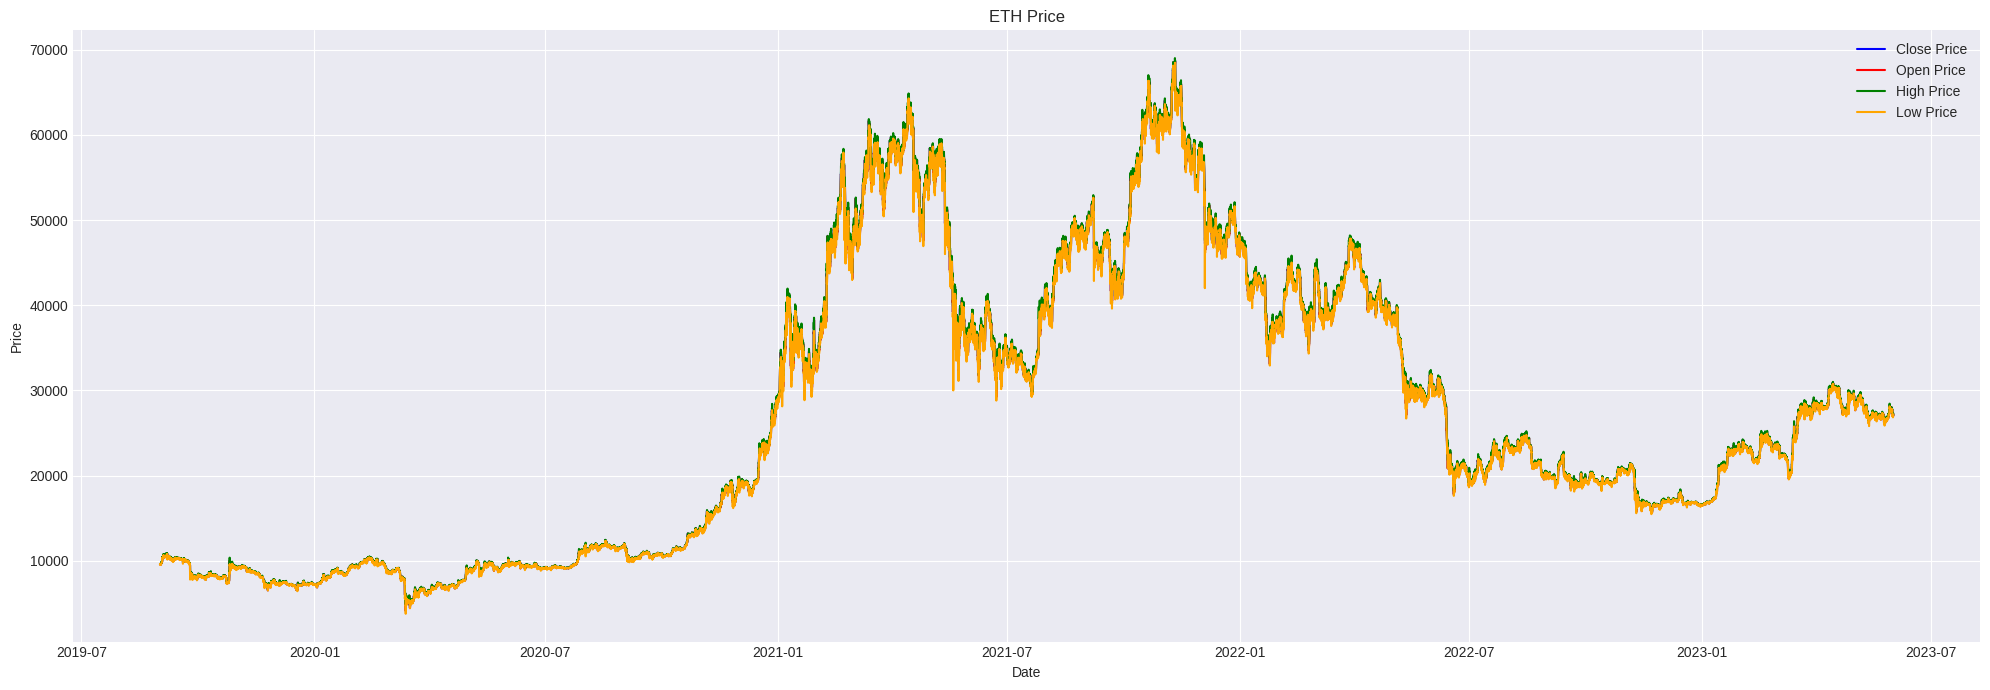

In [29]:
# Plotting OHCL together

plt.figure(figsize=(20, 7))

# Plotting Bitcoin prices
plt.plot(data_ETH["date"], data_BTC["close"], color='blue', label='Close Price')
plt.plot(data_ETH["date"], data_BTC["open"], color='red', label='Open Price')
plt.plot(data_ETH["date"], data_BTC["high"], color='green', label='High Price')
plt.plot(data_ETH["date"], data_BTC["low"], color='orange', label='Low Price')

plt.title("ETH Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()


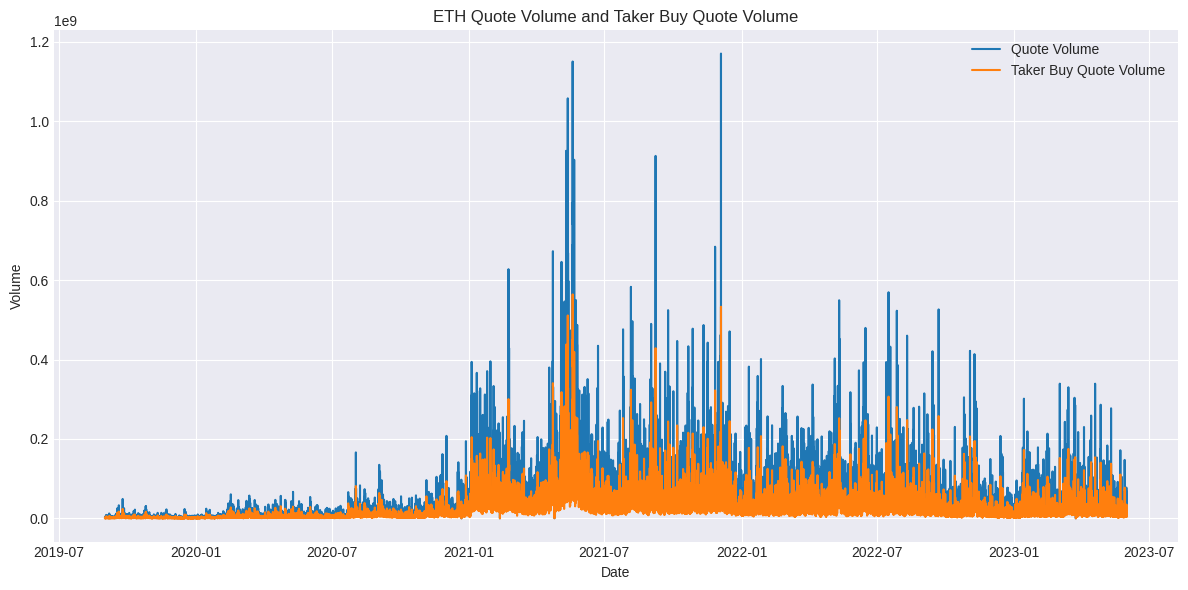

In [30]:
# Plotting together Quote Volume and Taker Buy Quote Volume as they have similar axis

plt.figure(figsize=(12, 6))

# Plotting Quote Volume and Taker Buy Quote Volume
plt.plot(data_ETH["date"], data_ETH["quote_volume"], label="Quote Volume")
plt.plot(data_ETH["date"], data_ETH["taker_buy_quote_volume"], label="Taker Buy Quote Volume")



plt.title("ETH Quote Volume and Taker Buy Quote Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.tight_layout()
plt.show()

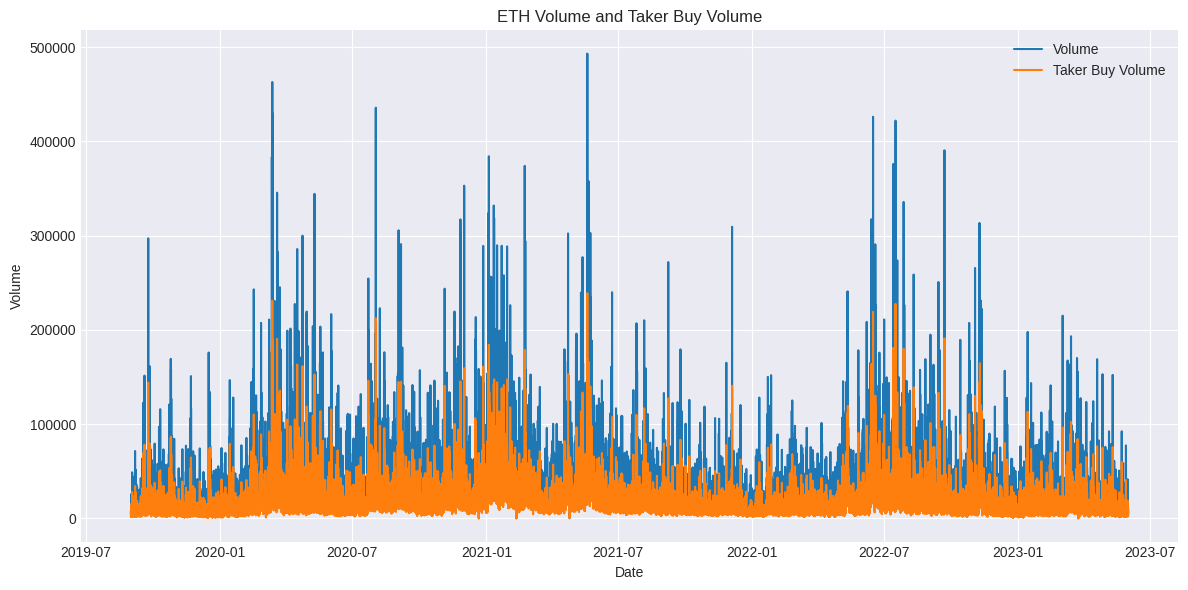

In [31]:
# Plotting together Volume and Taker Buy Volume as they have similar axis

plt.figure(figsize=(12, 6))

# Plotting Quote Volume and Taker Buy Quote Volume
plt.plot(data_ETH["date"], data_ETH["Volume"], label="Volume")
plt.plot(data_ETH["date"], data_ETH["taker_buy_volume"], label="Taker Buy Volume")


plt.title("ETH Volume and Taker Buy Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

plt.tight_layout()
plt.show()

## Heatmap Correlation

<ipython-input-32-dea774365c3d>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



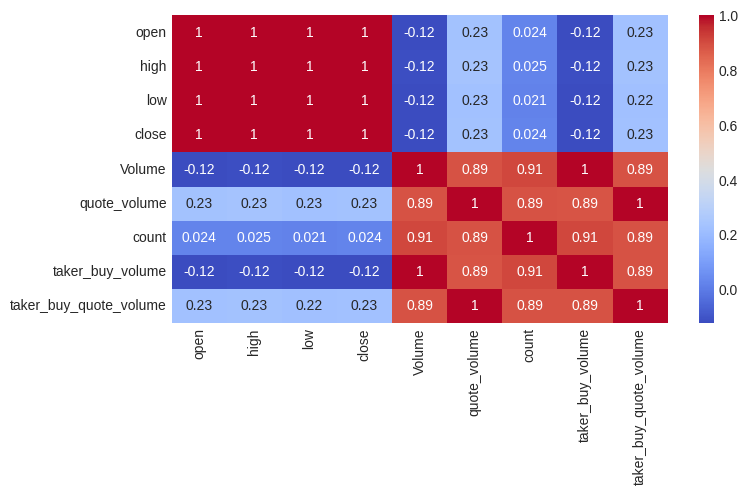

In [32]:
#plot the correlations
plt.figure(figsize=(8,4))

sns.heatmap(data_BTC.corr(), annot=True, cmap='coolwarm')
plt.show()

<ipython-input-33-06a046011633>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



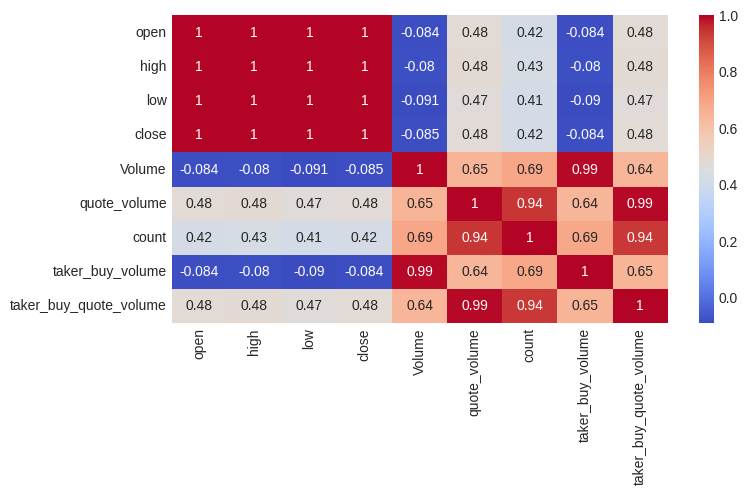

In [33]:
#plot the correlations
plt.figure(figsize=(8,4))

sns.heatmap(data_ETH.corr(), annot=True, cmap='coolwarm')
plt.show()

We can see that all OHCL are highly correlated with each other and all volumes and count as well with each other

## Plot Lag Correlation

Lag plots are most commonly used to look for patterns in time series data. We will try to find hourly, daily, weekly and monthly correlations, but will focus from now on, on the **Close Price**

Text(0.5, 1.0, 'Monthly Lag')

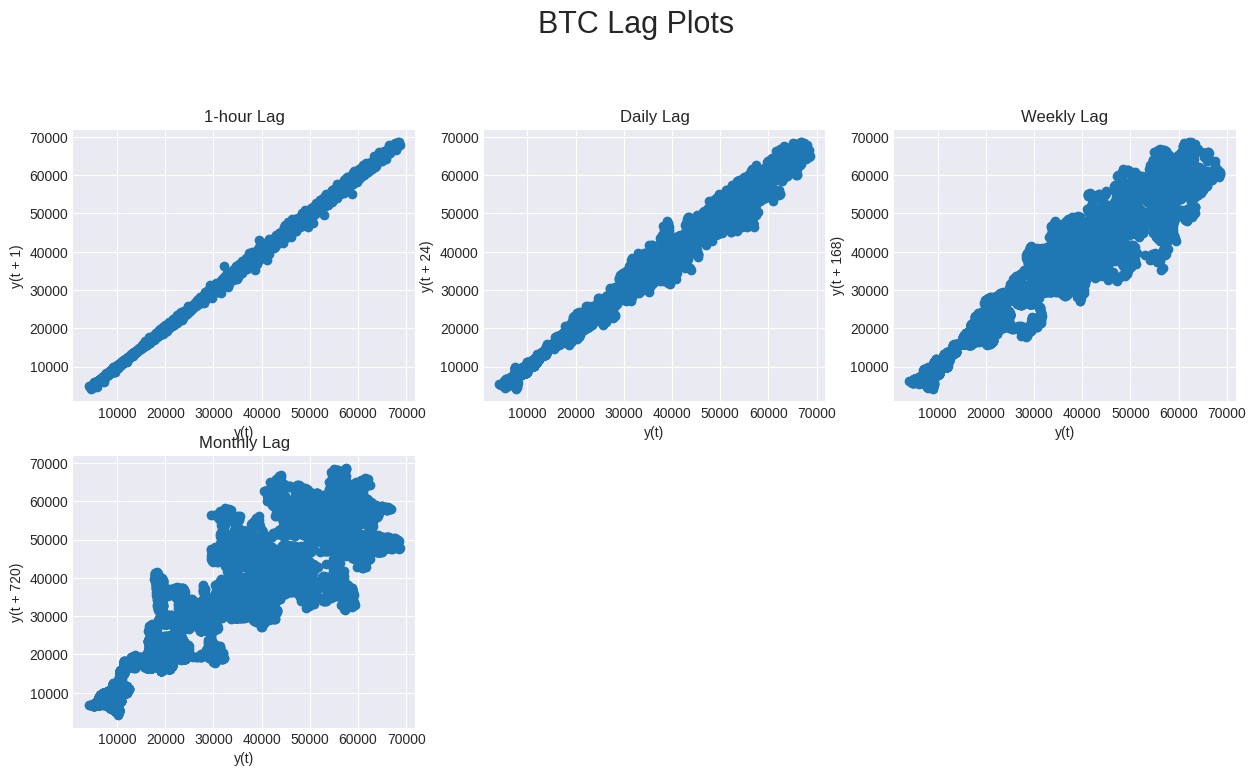

In [34]:
# BTC lag plot
plt.figure(figsize=(15,12))
plt.suptitle('BTC Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(data_BTC["close"], lag=1) # hourly lag
plt.title('1-hour Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(data_BTC["close"], lag=24) # daily lag
plt.title('Daily Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(data_BTC["close"], lag=168) # weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(data_BTC["close"], lag=720) # Monthly lag
plt.title('Monthly Lag')

Text(0.5, 1.0, 'Monthly Lag')

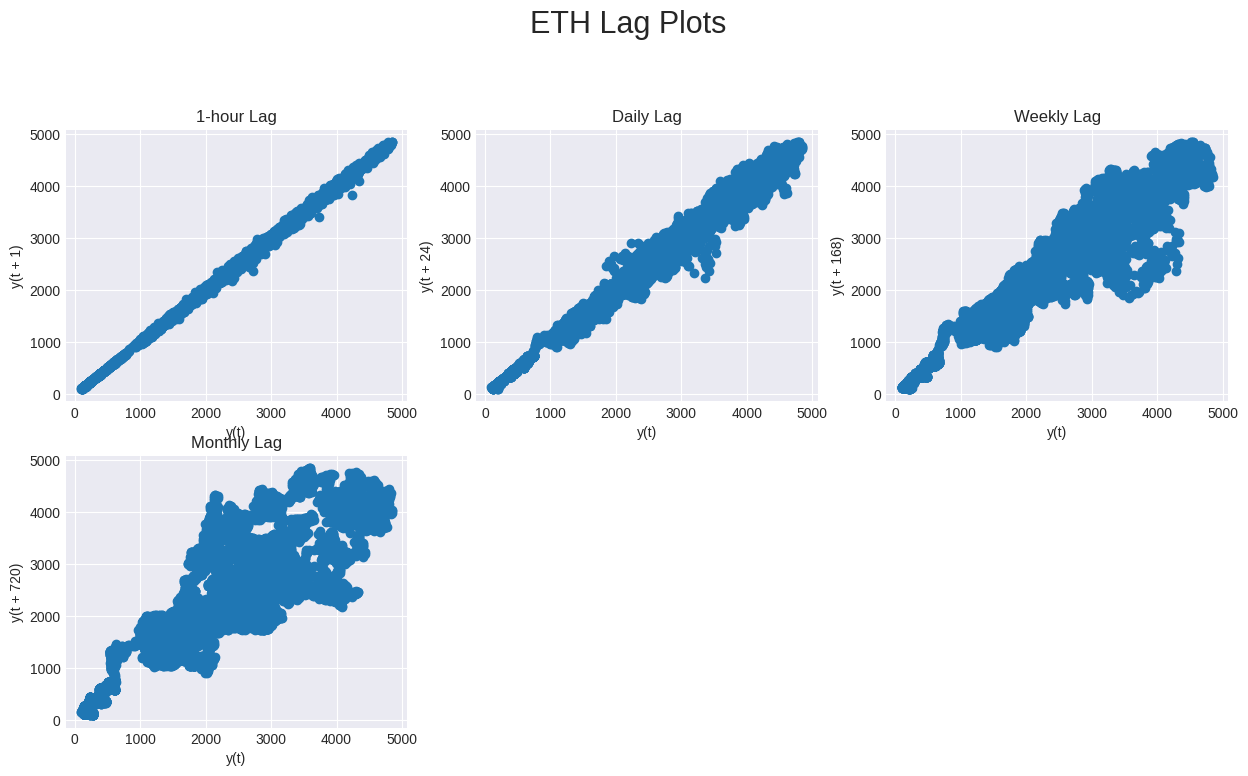

In [35]:
# ETH lag plot

plt.figure(figsize=(15,12))
plt.suptitle('ETH Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(data_ETH["close"], lag=1) # hourly lag
plt.title('1-hour Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(data_ETH["close"], lag=24) # daily lag
plt.title('Daily Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(data_ETH["close"], lag=168) # weekly lag (24*7)
plt.title('Weekly Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(data_ETH["close"], lag=720) # Monthly lag (24*30)
plt.title('Monthly Lag')

We see that the hourly and daily lag is correlated but the weekly get some noise for both currencies. Therefore we can keep working with the daily lag

## Daily Resampling

Here we will resample based on the correlation using the resample method from pandas

In [36]:
# BTC Daily resampling taking the mean value

data_BTC.set_index('date', inplace=True)  # Set 'date' column as the index

BTC_daily = data_BTC.resample('24H').mean()
BTC_daily = BTC_daily.reset_index()

BTC_daily.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01,9608.415417,9638.866250,9587.699583,9614.007083,814.391868,7.854720e+06,7971.833333,481.067108,4.644335e+06
1,2019-09-02,9904.533333,9960.438333,9885.246667,9929.980000,1864.177004,1.868592e+07,14756.458333,1047.512339,1.049724e+07
2,2019-09-03,10496.003750,10552.840000,10455.567083,10507.604583,1999.932366,2.106740e+07,17336.500000,1030.595969,1.085368e+07
3,2019-09-04,10544.943333,10596.092917,10493.059583,10543.090833,1830.995376,1.931360e+07,15977.375000,926.836152,9.780472e+06
4,2019-09-05,10549.111250,10601.045000,10507.465417,10548.702500,1415.456693,1.495256e+07,12910.250000,688.964492,7.287545e+06


In [37]:
# ETH Daily resampling taking the mean value

data_ETH.set_index('date', inplace=True)  # Set 'date' column as the index

ETH_daily = data_ETH.resample('24H').mean()
ETH_daily = ETH_daily.reset_index()

ETH_daily.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01,170.876250,171.441667,170.178750,170.858750,7964.188487,1.359474e+06,3876.500000,4390.231596,7.497815e+05
1,2019-09-02,173.000417,174.027083,172.603750,173.300000,12276.138020,2.143599e+06,4858.166667,6596.848287,1.151255e+06
2,2019-09-03,178.724167,179.689583,177.887917,178.773750,13660.743936,2.442576e+06,6156.583333,7055.815940,1.262071e+06
3,2019-09-04,177.194583,177.937917,176.277083,177.027917,11926.093821,2.109558e+06,5845.750000,6289.365111,1.112851e+06
4,2019-09-05,173.012500,173.705417,172.214167,172.975000,9698.076498,1.676979e+06,5142.666667,4995.959990,8.643510e+05


### Daily Time Series

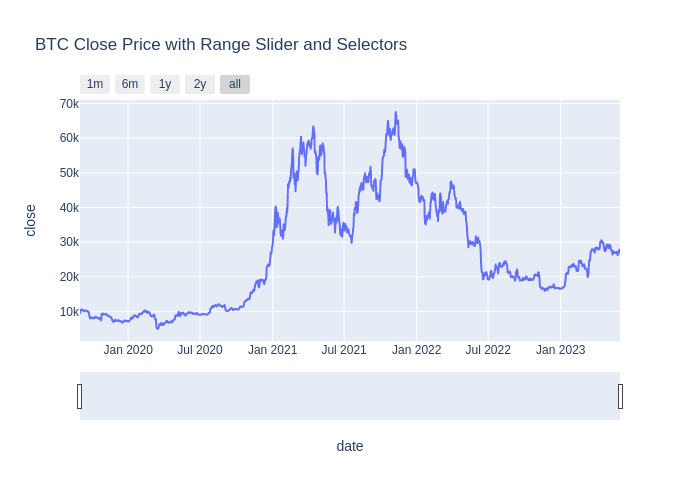

In [38]:
# BTC Daily Time Series

fig = px.line(BTC_daily, x='date', y='close', title='BTC Close Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")

        ])
    )
)

fig.show()

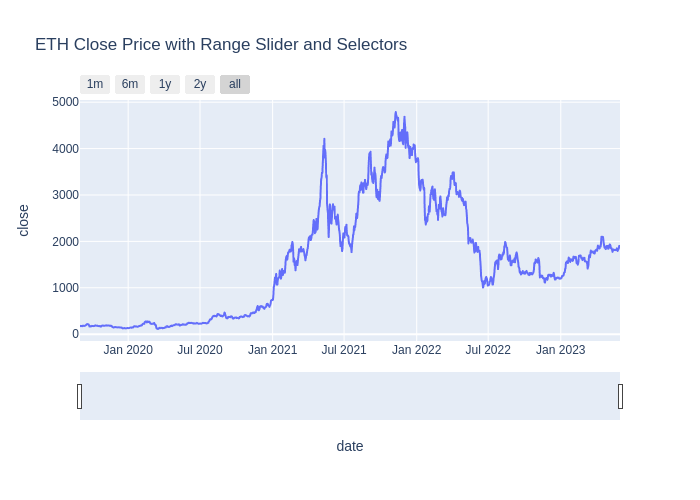

In [39]:
# ETH Daily Time Series

fig = px.line(ETH_daily, x='date', y='close', title='ETH Close Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")

        ])
    )
)

fig.show()

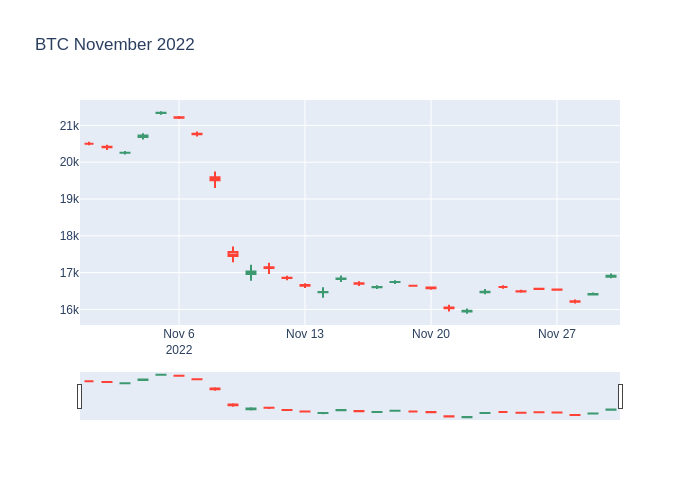

In [40]:
# Plotting the BTC crash of Nov 2022

plot_ = BTC_daily.set_index("date").loc["2022-11"]

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['open'],
                    high=plot_['high'],
                    low=plot_['low'],
                    close=plot_['close']))

fig.update_layout(title="BTC November 2022")

fig.show()

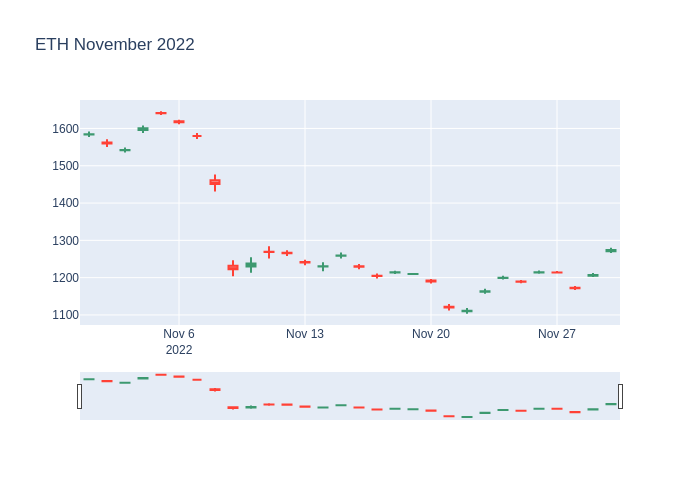

In [41]:
# Plotting the ETH crash of Nov 2022

plot_ = ETH_daily.set_index("date").loc["2022-11"]

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['open'],
                    high=plot_['high'],
                    low=plot_['low'],
                    close=plot_['close']))

fig.update_layout(title="ETH November 2022")

fig.show()

### Missing Data

In [42]:
BTC_daily.isnull().sum()

date                      0
open                      0
high                      0
low                       0
close                     0
Volume                    0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
dtype: int64

In [43]:
ETH_daily.isnull().sum()

date                      0
open                      0
high                      0
low                       0
close                     0
Volume                    0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
dtype: int64

## BTC Time Series Decomposition and Statistical Test

### Decomposition

<Figure size 1500x1200 with 0 Axes>

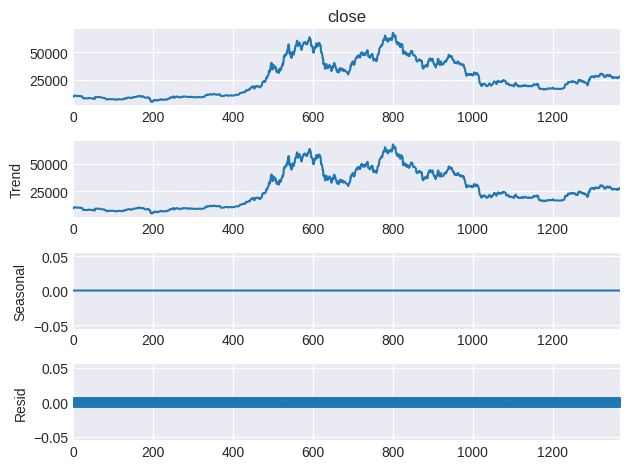

In [44]:
# Additive Decomposition

plt.figure(figsize=(15,12))
series = BTC_daily.close
result = seasonal_decompose(series, model='additive',period=1)
result.plot();

# The plots show no seasonality and no variance over time (see plot seasonal). So this means we can use an ARIMA model as SARIMAX has seasonality

<Figure size 1500x1200 with 0 Axes>

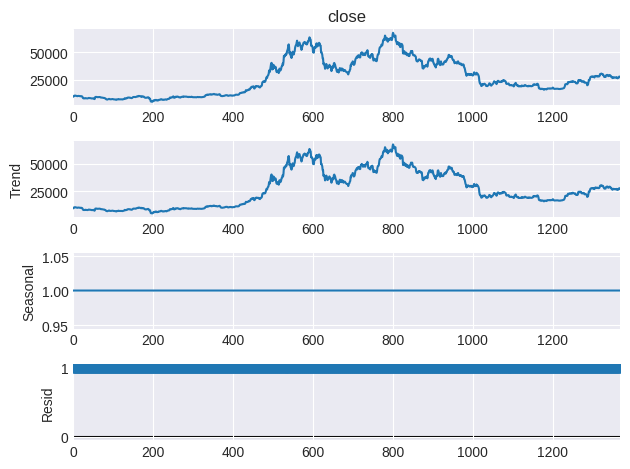

In [45]:
# Multiplicative Decomposition

plt.figure(figsize=(15,12))

series = BTC_daily.close

result_mul = seasonal_decompose(series, model='multiplicative',period=1)
result_mul.plot();


The plots show no seasonality and no variance over time (see plot seasonal).

Residuals values are a around a mean with similar/no variance, so we need further to explore

### Autocorrelation: ACF and PACF

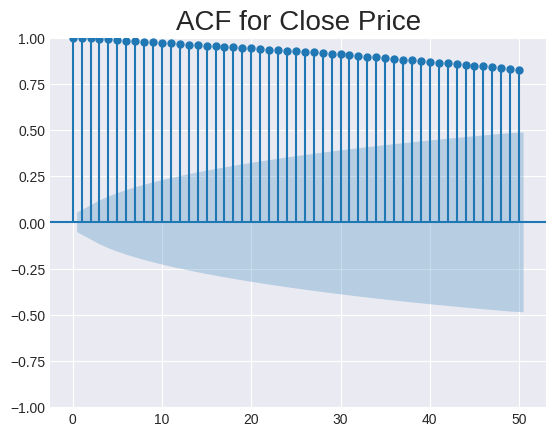

In [46]:
# Plot each correlation in an autocorrelation graph (ACF) below. Correlation coefficients vs. Nr. lags

acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Close Price", size=20)
plt.show()

# All values outside the blue area are significant. It represents like in linear regression, the significance of the beta values
# Meaning the smaller the blue cone the better as we have more values outside and our confidence interval is higher

# Peak inside of cone ➔ not statistically significant. Not applicable in our case

# But we can add more lags as the more we have, the better our model will predict, as past values predict future values linearly in the ACF

Analysing the ACF for a specific time lag could be a good predictor for the current value...


...but only at face value!


ACF measures direct & indirect effects

This is why we must analyse each lag by isolation as well!
Using our linear modelling, we can isolate each lag term
This is known as Auto Regression (AR) and the analysis of lag terms is known as a **Partial Autocorrelation Function (PACF)**

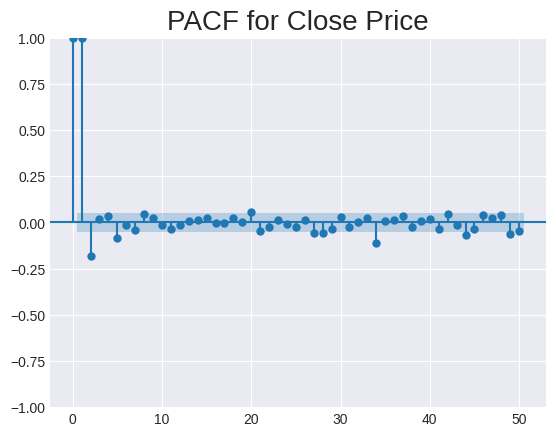

In [47]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Close Price", size=20)
plt.show()

# Count the number of lags before the values drop below the confidence levels (blue)
#  Note that the first lag is ignored, as it represents / between and itself
# We see the number of lags is 2, as more than that is not statistically significant

### Stationarity

#### KPSS

In [48]:
stats, p, lags, critical_values = kpss(series, 'ct')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [49]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

# If p-value is less than 0.05, then Test Statistics shall be higher than critical value 5%

Test Statistics : 1.1448238045725638
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


#### Augmented Dickey Fuller - ADF
ADF tests the following null hypothesis:

H0: The series is not-stationary

A p-value close to 0 (e.g. p < 0.05) indicates stationarity

In [50]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    p_value_adf = dftest[1]

    print("dftest: ", dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

    if p_value_adf > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [51]:
adf_test(series)

Results of Dickey-Fuller Test:
dftest:  (-1.5249625843629084, 0.5211285586439873, 4, 1364, {'1%': -3.435153261837347, '5%': -2.8636612797849814, '10%': -2.567899369049974}, 22272.122884008855)
Test Statistic                   -1.524963
p-value                           0.521129
#Lags Used                        4.000000
Number of Observations Used    1364.000000
Critical Value (1%)              -3.435153
Critical Value (5%)              -2.863661
Critical Value (10%)             -2.567899
dtype: float64
Series is not Stationary


The final result is that the series are **"Not Stationary"**

#### Differencing

Here we get non-stationary. So we need to do [differencing](https://https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html) to make the series stationary

Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis cannot be rejected. Hence, the series is non stationary.

Based upon the significance level of 0.05 and the p-value of KPSS test, there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is
not stationary

- Case 2: Both tests conclude that the series is stationary - The series is stationary

- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

**Here is an example of the procedure to follow when we need to do differencing**

<Axes: >

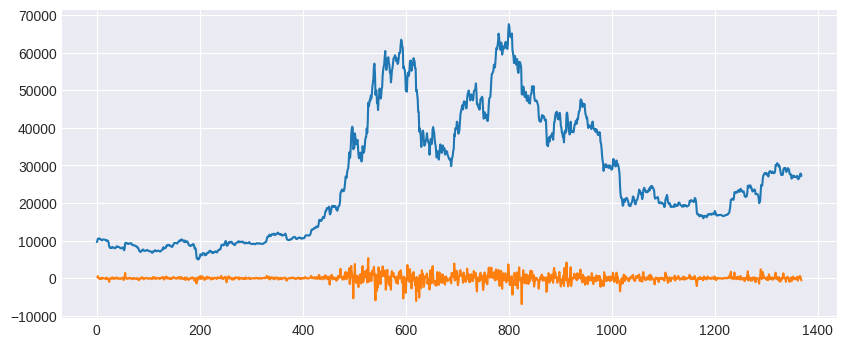

In [52]:
# Adding 1 level of differencing
series_diff = series.diff(1)

series.plot(figsize=(10, 4))
series_diff.dropna().plot(figsize=(10, 4))

# We see now certain stationarity in the series_diff

In [53]:
adf_test(series_diff.dropna())

Results of Dickey-Fuller Test:
dftest:  (-16.70658393854218, 1.4463198807408615e-29, 3, 1364, {'1%': -3.435153261837347, '5%': -2.8636612797849814, '10%': -2.567899369049974}, 22257.090606712693)
Test Statistic                -1.670658e+01
p-value                        1.446320e-29
#Lags Used                     3.000000e+00
Number of Observations Used    1.364000e+03
Critical Value (1%)           -3.435153e+00
Critical Value (5%)           -2.863661e+00
Critical Value (10%)          -2.567899e+00
dtype: float64
Series is Stationary


In [54]:
stats_diff, p_diff, lags_diff, critical_values_diff = kpss(series_diff.dropna(), 'ct')

print(f'Test Statistics : {stats_diff}')
print(f'p-value : {p_diff}')
print(f'Critical Values : {critical_values_diff}')

if p_diff < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.09312595022808731
p-value : 0.1
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is Stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




**ADF and KPPS are now stationary with one level of differencing (d = 1)**

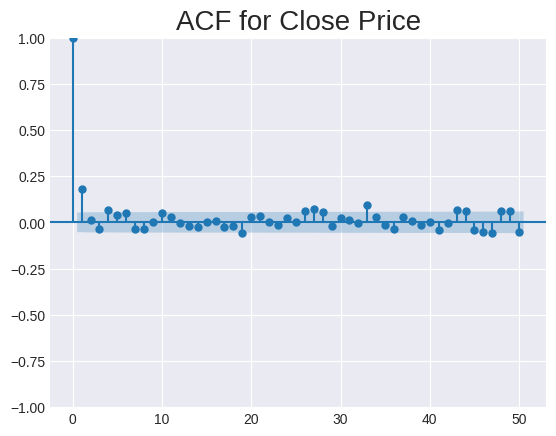

In [55]:
# ACF for d = 1
acf = plot_acf(series_diff.dropna(), lags=50, alpha=0.05)
plt.title("ACF for Close Price", size=20)
plt.show()

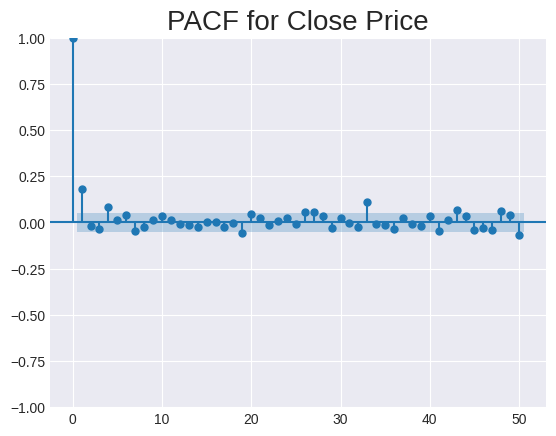

In [56]:
# PACF for d = 1
plot_pacf(series_diff.dropna(), lags=50, alpha=0.05, method='ols')
plt.title("PACF for Close Price", size=20)
plt.show()

We use the PACF plot to calculate the value for **p = 1** (nr of lags, excluding the first, till it drops into the blue area)
We use the ACF plot to calculate the value for **q = 1** (nr of lags, excluding the first, till it drops into the blue area)

This means we can use an ARIMA model (1,1,1), but we can also calculate p,q and d using `ndiffs` or `pm.auto_arima` automatically

In [57]:
# Automatically estimate differencing term

ndiffs(series)

1

In [58]:
# Automatically estimate p,d,q terms

smodel = pm.auto_arima(series,
          start_p=0, max_p=2,
          start_q=0, max_q=2,
          trend='t',
          seasonal=False,
          trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22698.742, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22655.969, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22656.657, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22698.742, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22657.579, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22657.705, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22659.419, Time=1.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=22655.969, Time=0.41 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.671 seconds


Here ARIMA has calculated (1,1,0).

Several models have similar AIC values around 22655 and our previous estimation is also good

Any of them might be the "true" underlying process

👉 When in doubt, pick the simplest model. In this case (1,1,0) is simpler

## ETH Time Series Decomposition and Statistical Test

### Decomposition

<Figure size 1500x1200 with 0 Axes>

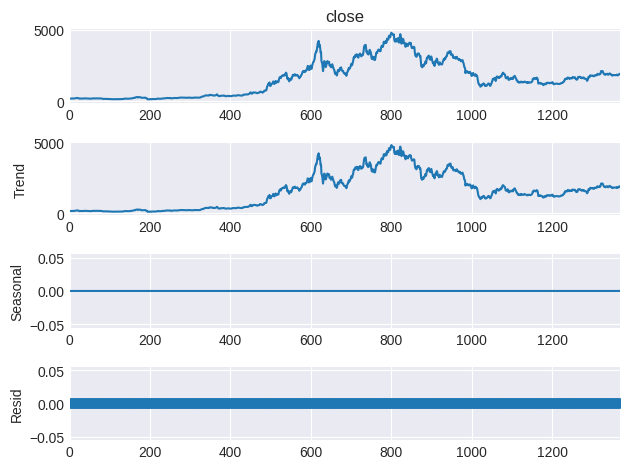

In [59]:
# Additive Decomposition

plt.figure(figsize=(15,12))

series = ETH_daily.close

result = seasonal_decompose(series, model='additive',period=1)
result.plot();

# The plots show no seasonality and no variance over time (see plot seasonal). So this means we can use an ARIMA model as SARIMAX has seasonality

<Figure size 1500x1200 with 0 Axes>

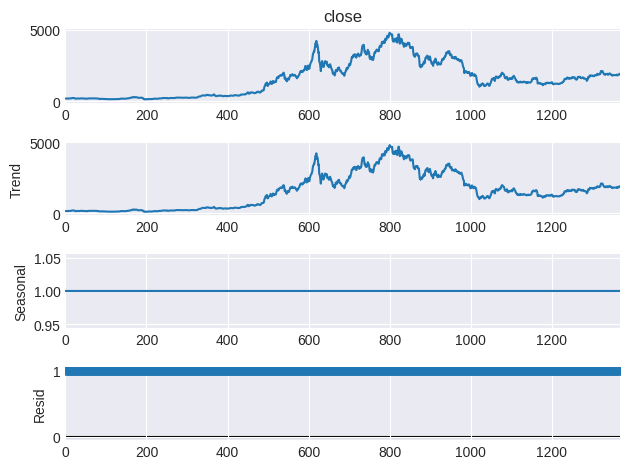

In [60]:
# Multiplicative Decomposition

plt.figure(figsize=(15,12))

series = ETH_daily.close
result_mul = seasonal_decompose(series, model='multiplicative',period=1)

result_mul.plot();

# The plots show no seasonality and no variance over time (see plot seasonal). So this means it is non-stationary

The plots show no seasonality and no variance over time (see plot seasonal).

Residuals values are a around a mean with similar/no variance, so we need further to explore

### Autocorrelation: ACF and PACF

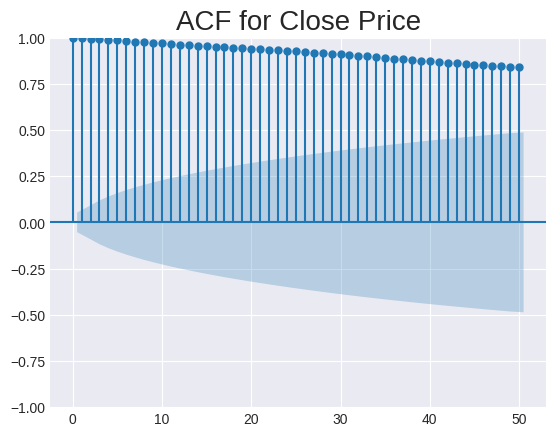

In [61]:
# Plot each correlation in an autocorrelation graph (ACF) below. Correlation coefficients vs. Nr. lags

acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Close Price", size=20)
plt.show()

# All values outside the blue area are significant. It represents like in linear regression, the significance of the beta values
# Meaning the smaller the blue cone the better as we have more values outside and our confidence interval is higher

# Peak inside of cone ➔ not statistically significant. Not applicable in our case

# But we can add more lags as the more we have, the better our model will predict, as past values predict future values linearly in the ACF

Analysing the ACF for a specific time lag could be a good predictor for the current value...


...but only at face value!


ACF measures direct & indirect effects

This is why we must analyse each lag by isolation as well!
Using our linear modelling, we can isolate each lag term
This is known as Auto Regression (AR) and the analysis of lag terms is known as a **Partial Autocorrelation Function (PACF)**

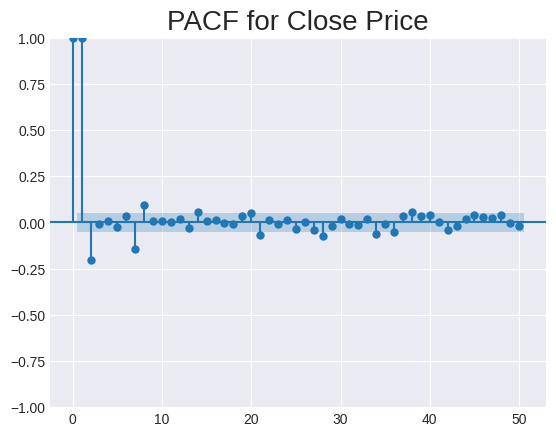

In [62]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Close Price", size=20)
plt.show()

# Count the number of lags before the values drop below the confidence levels (blue)
#  Note that the first lag is ignored, as it represents / between and itself
# We see the number of lags is 2, as more than that is not statistically significant

### Stationarity

#### KPSS

In [63]:
stats, p, lags, critical_values = kpss(series, 'ct')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [64]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

# If p-value is less than 0.05, then Test Statistics shall be higher than critical value 5%

Test Statistics : 1.0772035714589636
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


#### Augmented Dickey Fuller - ADF
ADF tests the following null hypothesis:

H0: The series is not-stationary

A p-value close to 0 (e.g. p < 0.05) indicates stationarity

In [65]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    p_value_adf = dftest[1]

    print("dftest: ", dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

    if p_value_adf > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [66]:
adf_test(series)

Results of Dickey-Fuller Test:
dftest:  (-1.622247039910407, 0.4715514583355204, 7, 1361, {'1%': -3.435163869552687, '5%': -2.863665960737661, '10%': -2.567901861810129}, 15268.72427731509)
Test Statistic                   -1.622247
p-value                           0.471551
#Lags Used                        7.000000
Number of Observations Used    1361.000000
Critical Value (1%)              -3.435164
Critical Value (5%)              -2.863666
Critical Value (10%)             -2.567902
dtype: float64
Series is not Stationary


The final result is that the series are **"Not Stationary"**

#### Differencing

Here we get non-stationary. So we need to do [differencing](https://https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html) to make the series stationary

Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis cannot be rejected. Hence, the series is non stationary.

Based upon the significance level of 0.05 and the p-value of KPSS test, there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is
not stationary

- Case 2: Both tests conclude that the series is stationary - The series is stationary

- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

**Here is an example of the procedure to follow when we need to do differencing**

<Axes: >

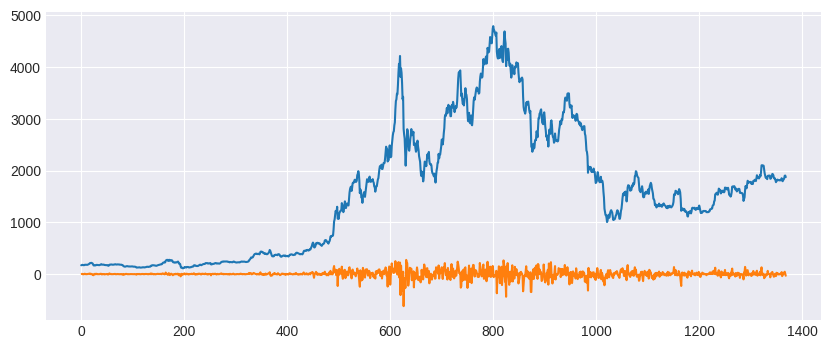

In [67]:
# Adding 1 level of differencing
series_diff = series.diff(1)

series.plot(figsize=(10, 4))
series_diff.dropna().plot(figsize=(10, 4))

# We see now certain stationarity in the series_diff

In [68]:
adf_test(series_diff.dropna())

Results of Dickey-Fuller Test:
dftest:  (-13.19816469291631, 1.108373516339643e-24, 6, 1361, {'1%': -3.435163869552687, '5%': -2.863665960737661, '10%': -2.567901861810129}, 15259.077660655923)
Test Statistic                -1.319816e+01
p-value                        1.108374e-24
#Lags Used                     6.000000e+00
Number of Observations Used    1.361000e+03
Critical Value (1%)           -3.435164e+00
Critical Value (5%)           -2.863666e+00
Critical Value (10%)          -2.567902e+00
dtype: float64
Series is Stationary


In [69]:
stats_diff, p_diff, lags_diff, critical_values_diff = kpss(series_diff.dropna(), 'ct')

print(f'Test Statistics : {stats_diff}')
print(f'p-value : {p_diff}')
print(f'Critical Values : {critical_values_diff}')

if p_diff < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.07644281628045198
p-value : 0.1
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is Stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




**ADF and KPPS are now stationary with one level of differencing (d = 1)**

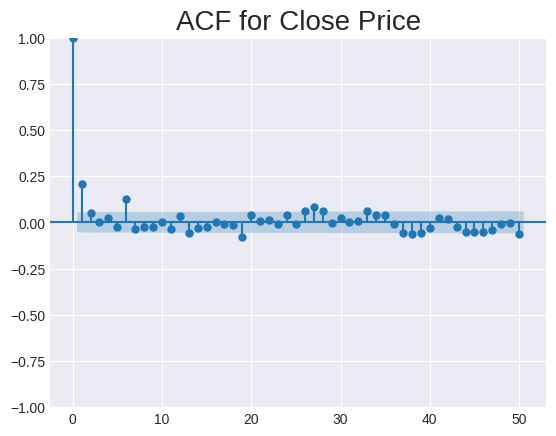

In [70]:
# ACF for d = 1
acf = plot_acf(series_diff.dropna(), lags=50, alpha=0.05)
plt.title("ACF for Close Price", size=20)
plt.show()

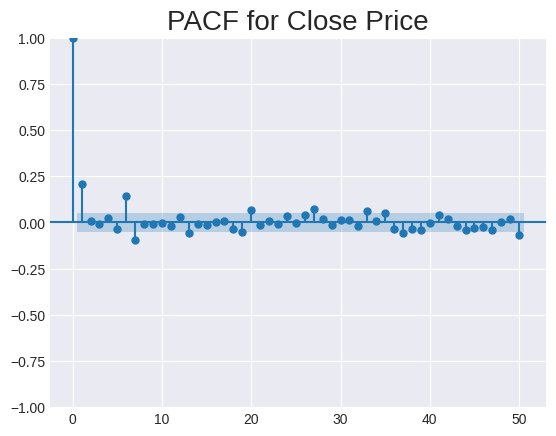

In [71]:
# PACF for d = 1
plot_pacf(series_diff.dropna(), lags=50, alpha=0.05, method='ols')
plt.title("PACF for Close Price", size=20)
plt.show()

We use the PACF plot to calculate the value for **p = 1** (nr of lags, excluding the first, till it drops into the blue area)
We use the ACF plot to calculate the value for **q = 1** (nr of lags, excluding the first, till it drops into the blue area)

This means we can use an ARIMA model (1,1,1), but we can also calculate p,q and d using pm.auto_arima automatically

In [72]:
# Automatically estimate differencing term

ndiffs(series)

1

In [73]:
# Automatically estimate p,d,q terms

smodel = pm.auto_arima(series,
          start_p=0, max_p=2,
          start_q=0, max_q=2,
          trend='t',
          seasonal=False,
          trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15608.591, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15551.851, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15555.267, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15608.591, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15553.770, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15553.780, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15537.668, Time=3.49 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15534.063, Time=4.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15555.655, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15534.063, Time=2.70 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 13.904 seconds


Here ARIMA has calculated (2,1,2).

Several models have similar AIC values around 15534 and our previous estimation is also good

Any of them might be the "true" underlying process

👉 When in doubt, pick the simplest model. In this case (1,1,1) is simpler, but taking ARIMA solution is good as well

## BTC Trends: Moving Average

Rolling or moving average is a method to average out noise, which are random short-term fluctuations in price, from data and make easier to detect trends. Splits and aggregating the data into windows accorging to functions like mean, median...

For example, a 7-day moving average reflects short-term trends in the stock market, whereas a 100-day rolling average indicates major trends in the stock market.

Here we calculate the **arithmetic mean** of a given set of prices over a specified period.

In [74]:
BTC_daily = BTC_daily.set_index('date')

# compute a short-term 20-day moving average
MA20 = BTC_daily.close.rolling(20).mean()

# compute a Long-term 50-day moving average
MA50 = BTC_daily.close.rolling(50).mean()

# compute a Long-term 100-day moving average
MA100 = BTC_daily.close.rolling(100).mean()

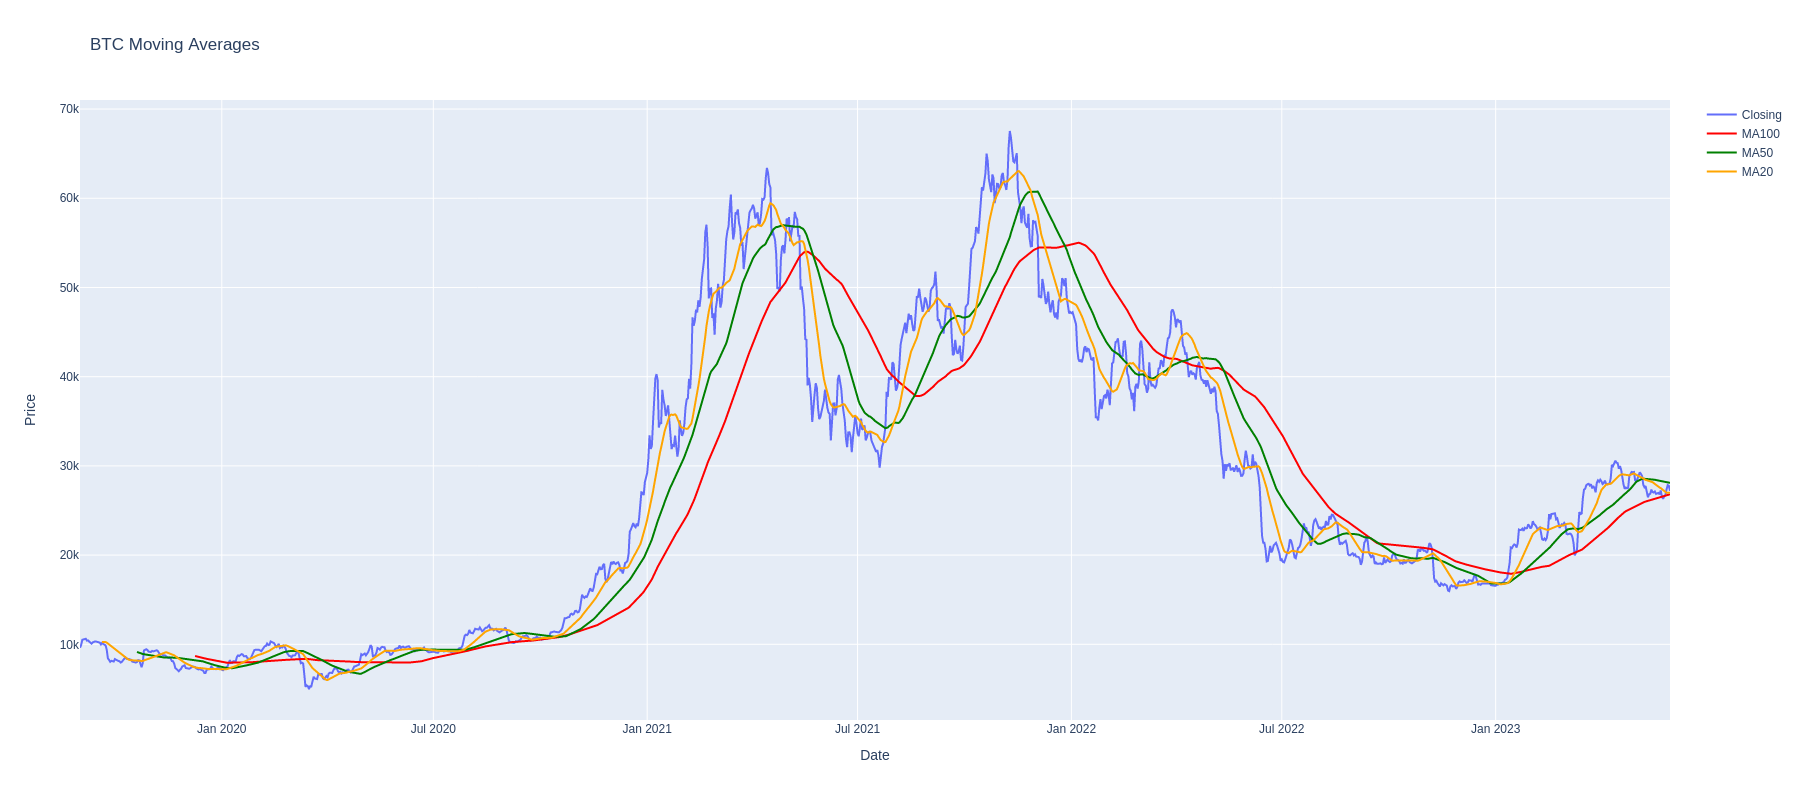

In [75]:
# Create a trace for the closing price
trace_close = go.Scatter(x=BTC_daily.index, y=BTC_daily.close, mode='lines', name='Closing')

# Create traces for the moving averages
trace_ma100 = go.Scatter(x=BTC_daily.index, y=MA100, mode='lines', name='MA100', line=dict(color='red'))
trace_ma50 = go.Scatter(x=BTC_daily.index, y=MA50, mode='lines', name='MA50', line=dict(color='green'))
trace_ma20 = go.Scatter(x=BTC_daily.index, y=MA20, mode='lines', name='MA20', line=dict(color='orange'))


layout = go.Layout(
    title='BTC Moving Averages',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    showlegend=True,
    height = 800,
    width=1800  # Adjust the width as per your preference
)

# Create a figure and add the traces and layout
fig = go.Figure(data=[trace_close, trace_ma100, trace_ma50, trace_ma20], layout=layout)

# Show the plot
fig.show()


We can observe from the chart that in Mai and November of 2021, the price crosses below the 50-day MA, which indicates a **downward trend**, and in October 2020, the price crosses above the MA, which shows an **upward trend**.

From the charts that around Mai and December of 2021, the 20-day MA crosses below the 100-day MA. It indicates that the trend is shifting downwards, and **it’s a sell signal**. Towards January 2023, the 20-day MA crosses above the 100-day MA. It shows that the trend is shifting upwards, and it’s a **buy signal**.

Further investigating the charts in detail during 2021 or 2022 separately, which are the years with more fluctuations, can bring interesting insights

## ETH Trends: Moving Average

Rolling or moving average is a method to average out noise, which are random short-term fluctuations in price, from data and make easier to detect trends. Splits and aggregating the data into windows accorging to functions like mean, median...

For example, a 7-day moving average reflects short-term trends in the stock market, whereas a 100-day rolling average indicates major trends in the stock market.

Here we calculate the **arithmetic mean** of a given set of prices over a specified period.

In [76]:
ETH_daily = ETH_daily.set_index('date')

# compute a short-term 20-day moving average
MA20 = ETH_daily.close.rolling(20).mean()

# compute a Long-term 50-day moving average
MA50 = ETH_daily.close.rolling(50).mean()

# compute a Long-term 100-day moving average
MA100 = ETH_daily.close.rolling(100).mean()

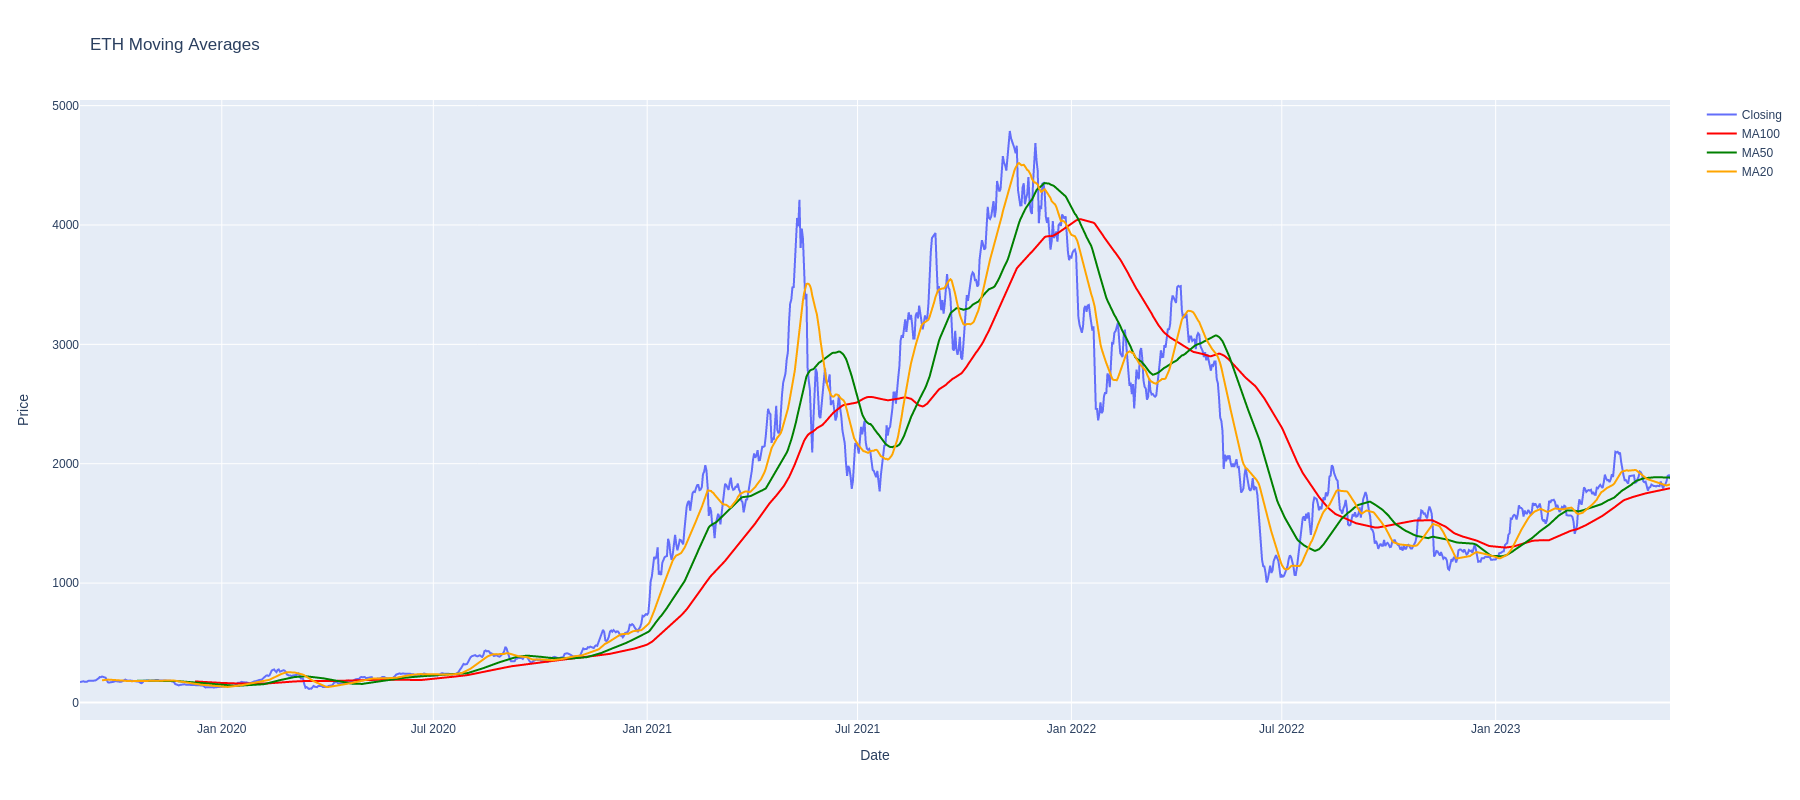

In [77]:
# Create a trace for the closing price
trace_close = go.Scatter(x=ETH_daily.index, y=ETH_daily.close, mode='lines', name='Closing')

# Create traces for the moving averages
trace_ma100 = go.Scatter(x=ETH_daily.index, y=MA100, mode='lines', name='MA100', line=dict(color='red'))
trace_ma50 = go.Scatter(x=ETH_daily.index, y=MA50, mode='lines', name='MA50', line=dict(color='green'))
trace_ma20 = go.Scatter(x=ETH_daily.index, y=MA20, mode='lines', name='MA20', line=dict(color='orange'))

layout = go.Layout(
    title='ETH Moving Averages',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    showlegend=True,
    height = 800,
    width=1800  # Adjust the width as per your preference
)

# Create a figure and add the traces and layout
fig = go.Figure(data=[trace_close, trace_ma100, trace_ma50, trace_ma20], layout=layout)

# Show the plot
fig.show()


We can observe from the chart that in Mai and November of 2021, the price crosses below the 50-day MA, which indicates a **downward trend**, and in October 2020, the price crosses above the MA, which shows an **upward trend**.

From the charts that around December of 2021, the 20-day MA crosses below the 100-day MA. It indicates that the trend is shifting downwards, and **it’s a sell signal**. Towards January 2023, the 20-day MA crosses above the 100-day MA. It shows that the trend is shifting upwards, and it’s a **buy signal**.

Further investigating the charts in detail during 2021 or 2022 separately, which are the years with more fluctuations, can bring interesting insights

## Daily Return Series

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

A return is a change in the price of an asset over time.

Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

We will use the pandas **`pct_change()`** function to compute the returns.

These are relative price changes of the cryptocurrencies

In [78]:
close_BTC = BTC_daily[["close"]]
close_BTC.head()

,close
date,
2019-09-01,9614.007083
2019-09-02,9929.980000
2019-09-03,10507.604583
2019-09-04,10543.090833
2019-09-05,10548.702500


In [79]:
close_ETH = ETH_daily[["close"]]
close_ETH.head()

,close
date,
2019-09-01,170.858750
2019-09-02,173.300000
2019-09-03,178.773750
2019-09-04,177.027917
2019-09-05,172.975000


In [80]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's

returns_BTC = close_BTC.pct_change().dropna(axis=0)
returns_ETH = close_ETH.pct_change().dropna(axis=0)

In [81]:
returns_BTC.head()

,close
date,
2019-09-02,0.032866
2019-09-03,0.058170
2019-09-04,0.003377
2019-09-05,0.000532
2019-09-06,0.006770


In [82]:
returns_ETH.head()

,close
date,
2019-09-02,0.014288
2019-09-03,0.031585
2019-09-04,-0.009766
2019-09-05,-0.022894
2019-09-06,0.003912


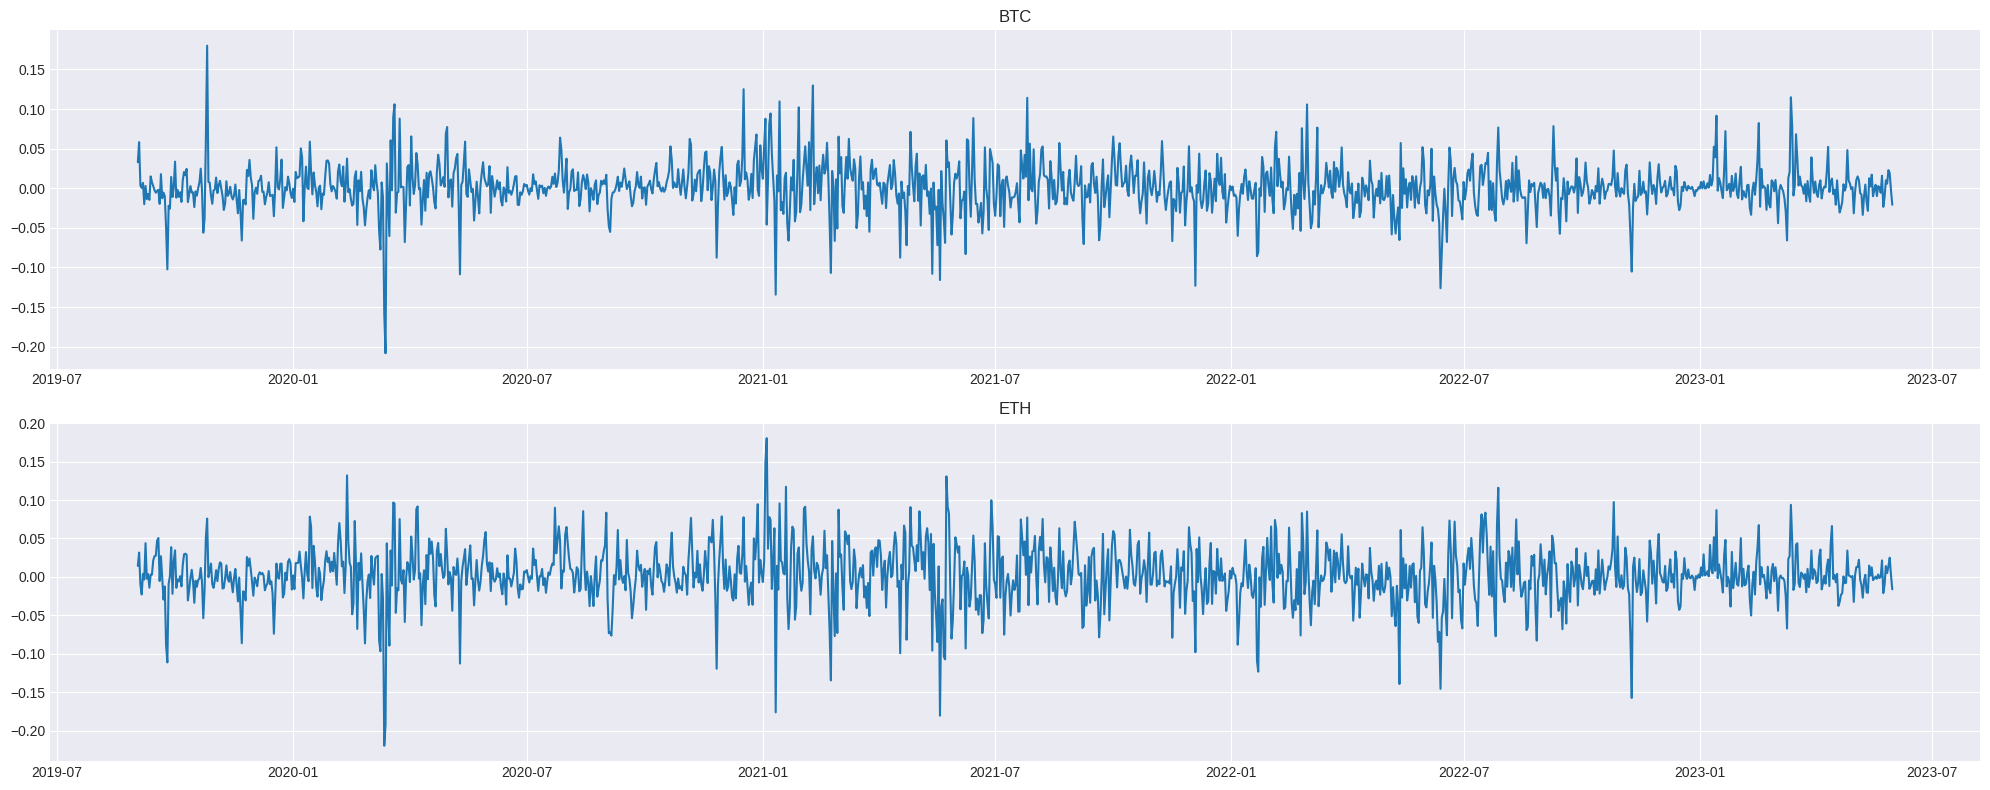

In [83]:
# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

# Plotting Bitcoin adjusted closing price
axs[0].plot(returns_BTC.index, returns_BTC.close)
axs[0].set_title('BTC')

# Plotting Ethereum adjusted closing price
axs[1].plot(returns_ETH.index, returns_ETH.close)
axs[1].set_title('ETH')

# Adjusting the layout
plt.tight_layout()

# Displaying the plots
plt.show()


For both cryptocurrencies, we can see a huge crash around Mai of 2020

### Volatilty

Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [84]:
# Volatility, standard deviation of the returns

returns_BTC.std(), returns_ETH.std()

(close    0.029633
 dtype: float64,
 close    0.036918
 dtype: float64)

ETH is more volatile than Bitcoin

### Cumulative Returns

Cumulative return express the total change in the price of an asset over time.

We use the pandas **`cumprod()`** function to calculate the daily cumulative simple returns.

In [85]:
# Cumulative return series

cum_returns_BTC = ((1 + returns_BTC).cumprod() - 1)*100
cum_returns_BTC.head()

,close
date,
2019-09-02,3.286589
2019-09-03,9.294746
2019-09-04,9.663855
2019-09-05,9.722225
2019-09-06,10.465065


In [86]:
# Cumulative return series

cum_returns_ETH = ((1 + returns_ETH).cumprod() - 1)*100
cum_returns_ETH.head()

,close
date,
2019-09-02,1.428812
2019-09-03,4.632482
2019-09-04,3.610682
2019-09-05,1.238596
2019-09-06,1.634635


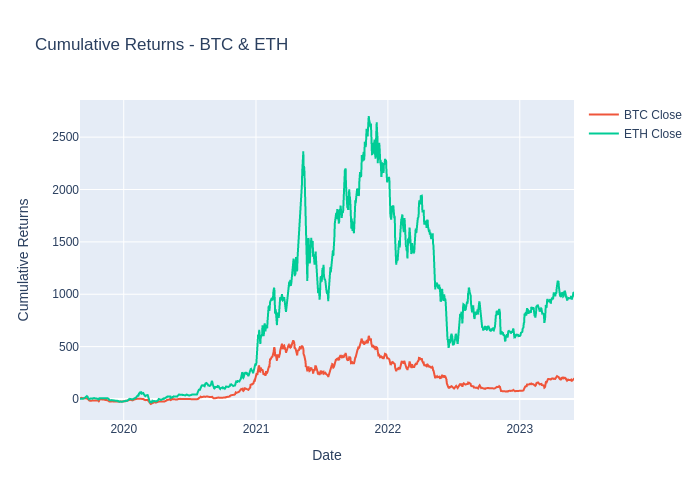

In [87]:
# Plotting the cumulative returns for Bitcoin and Ethereum
fig = px.line(title='Cumulative Returns - BTC & ETH')
fig.add_scatter(x=cum_returns_BTC.index, y=cum_returns_BTC['close'], name='BTC Close')
fig.add_scatter(x=cum_returns_ETH.index, y=cum_returns_ETH['close'], name='ETH Close')

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Cumulative Returns')

# Display the plot
fig.show()


Both currencies show a similar behaviour, but BTC overcomes ETH in the last 4 years

### Correlation

Correlation is the degree in which asset prices move together (positive correlation) or against each other (negative correlation). The exact measurement is referred to as the correlation coefficient and always falls between a negative and positive spectrum of -1.0 to +1.0. Coefficients close to zero indicate no correlation.

We’ll show the correlation on returns since correlation on raw price data can give biased results.

For than we join the dataframes of both currencies and plot a heatmap

In [88]:
returns_BTC = returns_BTC.rename(columns={"close": "close_BTC"})
returns_BTC.head()

,close_BTC
date,
2019-09-02,0.032866
2019-09-03,0.058170
2019-09-04,0.003377
2019-09-05,0.000532
2019-09-06,0.006770


In [89]:
returns_ETH = returns_ETH.rename(columns={"close": "close_ETH"})
returns_ETH.head()

,close_ETH
date,
2019-09-02,0.014288
2019-09-03,0.031585
2019-09-04,-0.009766
2019-09-05,-0.022894
2019-09-06,0.003912


In [90]:
joined_df = pd.merge(returns_BTC, returns_ETH, left_index=True, right_index=True)
joined_df.head()

,close_BTC,close_ETH
date,,
2019-09-02,0.032866,0.014288
2019-09-03,0.058170,0.031585
2019-09-04,0.003377,-0.009766
2019-09-05,0.000532,-0.022894
2019-09-06,0.006770,0.003912


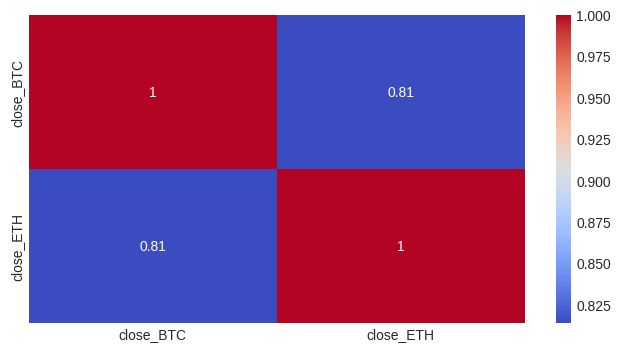

In [91]:
#plot the correlations
plt.figure(figsize=(8,4))

sns.heatmap(joined_df.corr(), annot=True, cmap='coolwarm')
plt.show()

From the heatmap, we can see that BTC and ETH, are highly correlated.

That means for example that when BTC goes up, ETH also goes up, and when BTC falls, ETH also falls.